In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./Safety_Trends.csv")
df

Id     Country  Year         Demographic      Gender      Age  \
0        1     Albania  2023  AllGenders_AllAges  AllGenders  AllAges   
1       10     Albania  2024  AllGenders_AllAges  AllGenders  AllAges   
2       19     Albania  2025  AllGenders_AllAges  AllGenders  AllAges   
3       28     Albania  2026  AllGenders_AllAges  AllGenders  AllAges   
4       37     Albania  2027  AllGenders_AllAges  AllGenders  AllAges   
...    ...         ...   ...                 ...         ...      ...   
6610  6579  Uzbekistan  2025        Male_Under18        Male  Under18   
6611  6588  Uzbekistan  2026        Male_Under18        Male  Under18   
6612  6597  Uzbekistan  2027        Male_Under18        Male  Under18   
6613  6606  Uzbekistan  2028        Male_Under18        Male  Under18   
6614  6615  Uzbekistan  2029        Male_Under18        Male  Under18   

      Probability       VALUE  YoY_Change  YoY_Pct_Change Yearly_Trend  \
0       38.174139   62.179344         NaN             NaN   First Year   
1       39.716374   62.335835    0.156491        0.251677       Stable   
2       41.289149   62.094128   -0.241707       -0.387750       Stable   
3       42.892463   60.939846   -1.154282       -1.858923    Declining   
4       44.526316   58.816320   -2.123526       -3.484626    Declining   
...           ...         ...         ...             ...          ...   
6610     6.512796  101.490130   -3.091170       -2.955758    Declining   
6611     6.760881   98.666310   -2.823820       -2.782359    Declining   
6612     7.013602   96.067140   -2.599170       -2.634303    Declining   
6613     7.270961   93.710434   -2.356706       -2.453186    Declining   
6614     7.532957   91.643660   -2.066774       -2.205490    Declining   

      Rolling_Slope  Rolling_Trend    Baseline  Cumulative_Growth  \
0               NaN            NaN   62.179344           0.000000   
1         -0.042608         Stable   62.179344           0.251677   
2         -0.697995  Sharp decline   62.179344          -0.137049   
3         -1.638904  Sharp decline   62.179344          -1.993424   
4         -1.925001  Sharp decline   62.179344          -5.408587   
...             ...            ...         ...                ...   
6610      -2.957495  Sharp decline  108.937970          -6.836771   
6611      -2.711495  Sharp decline  108.937970          -9.428907   
6612      -2.477938  Sharp decline  108.937970         -11.814825   
6613      -2.211740  Sharp decline  108.937970         -13.978171   
6614            NaN            NaN  108.937970         -15.875374   

        Growth_Stage  
0     Below baseline  
1     Above baseline  
2     Below baseline  
3     Below baseline  
4     Below baseline  
...              ...  
6610  Below baseline  
6611  Below baseline  
6612  Below baseline  
6613  Below baseline  
6614  Below baseline  

[6615 rows x 16 columns]

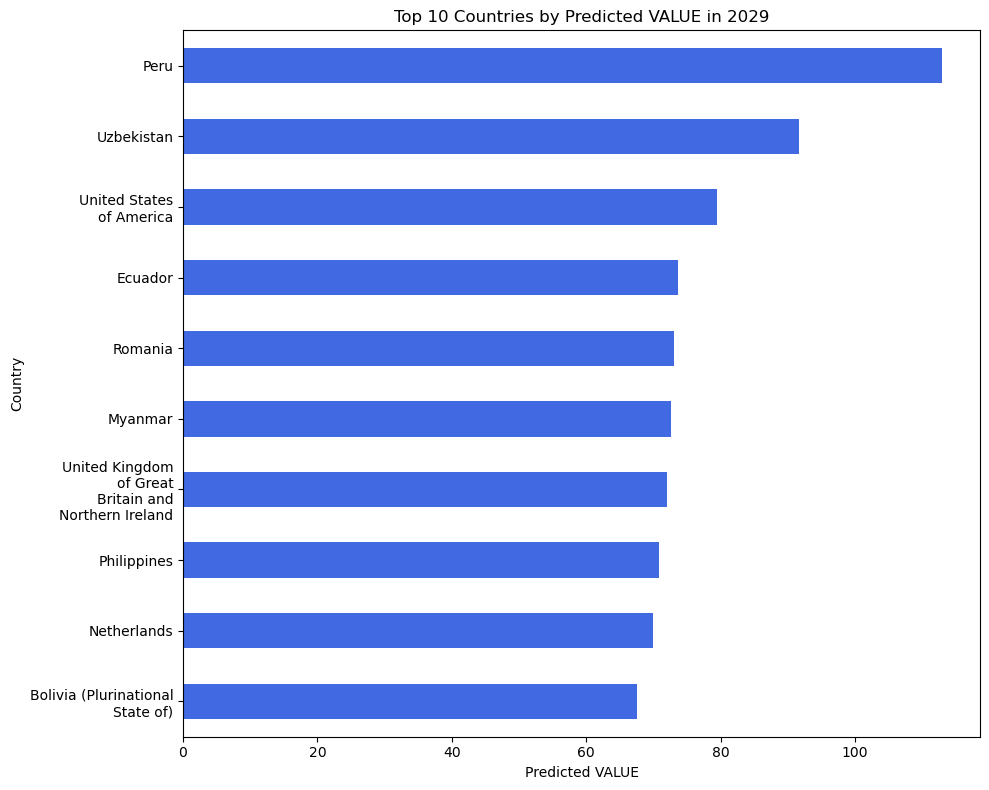

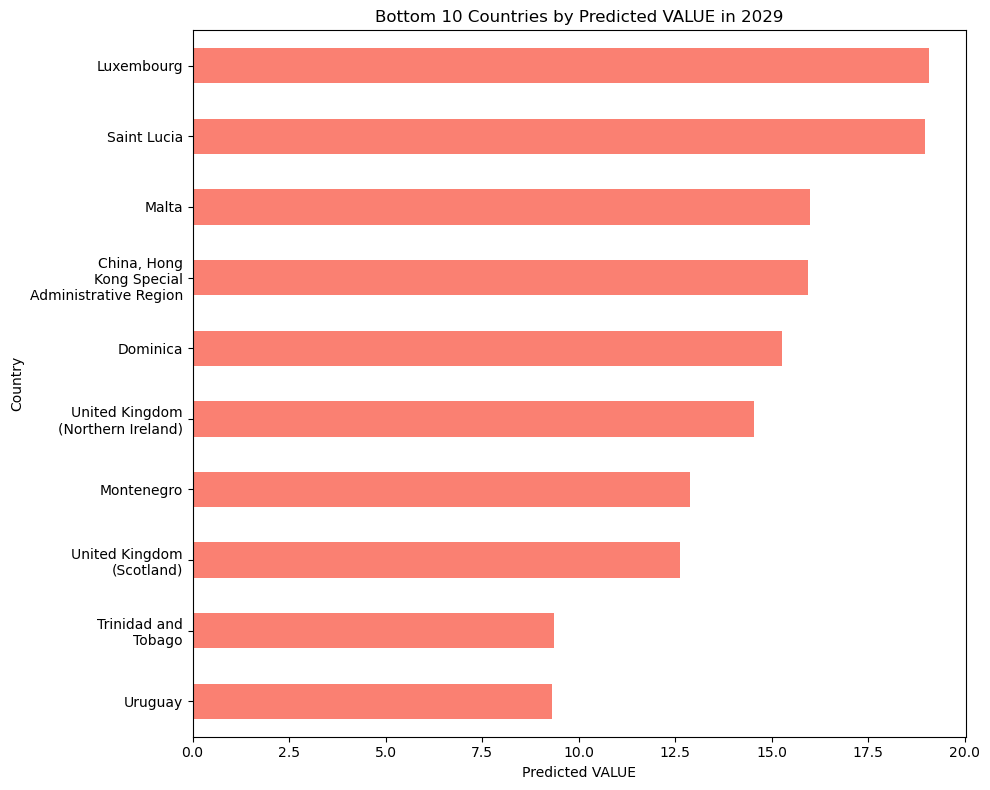

In [8]:
def format_country_name(name, words_per_line=2):
    words = name.split()
    lines = [" ".join(words[i:i+words_per_line]) for i in range(0, len(words), words_per_line)]
    return "\n".join(lines)

# Step 1: Get final year
final_year = df["Year"].max()

# Step 2: Filter for final year
df_final = df[df["Year"] == final_year].copy()

# Step 3: Get one value per country
final_values = df_final.drop_duplicates(subset="Country", keep="first")[["Country", "VALUE"]]
final_values_sorted = final_values.sort_values("VALUE", ascending=False).set_index("Country")

# Step 4: Get Top and Bottom 10
top_10 = final_values_sorted.head(10)
bottom_10 = final_values_sorted.tail(10)

# Step 5: Format country names (soft line breaks)
top_10.index = [format_country_name(name) for name in top_10.index]
bottom_10.index = [format_country_name(name) for name in bottom_10.index]

# Step 6: Plot Top 10
plt.figure(figsize=(10, 8))  # Increased height
top_10["VALUE"].plot(kind="barh", color="royalblue")
plt.title(f"Top 10 Countries by Predicted VALUE in {final_year}")
plt.xlabel("Predicted VALUE")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Step 7: Plot Bottom 10
plt.figure(figsize=(10, 8))
bottom_10["VALUE"].plot(kind="barh", color="salmon")
plt.title(f"Bottom 10 Countries by Predicted VALUE in {final_year}")
plt.xlabel("Predicted VALUE")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

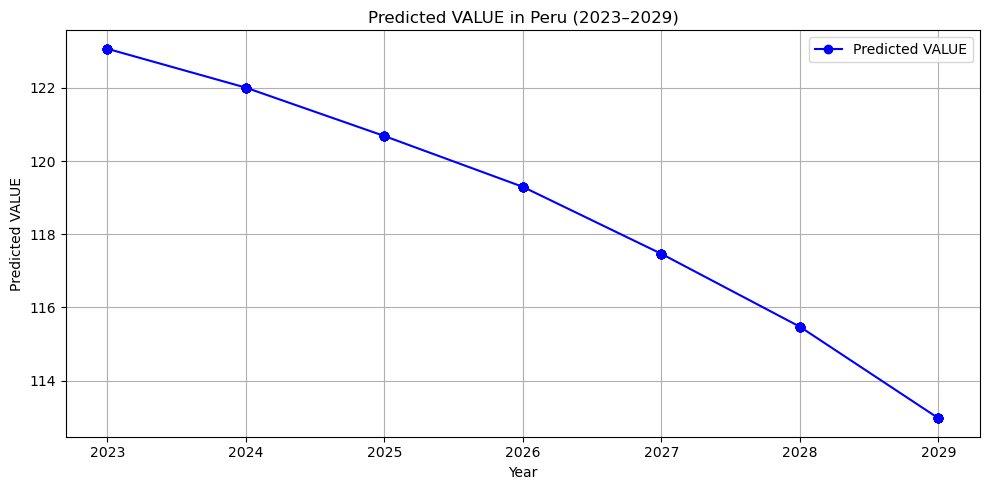

In [9]:
peru_data = df[df["Country"] == "Peru"].sort_values("Year")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(peru_data["Year"], peru_data["VALUE"], marker='o', linestyle='-', color='blue', label="Predicted VALUE")
plt.title(f"Predicted VALUE in Peru ({peru_data['Year'].min()}–{peru_data['Year'].max()})")
plt.xlabel("Year")
plt.ylabel("Predicted VALUE")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


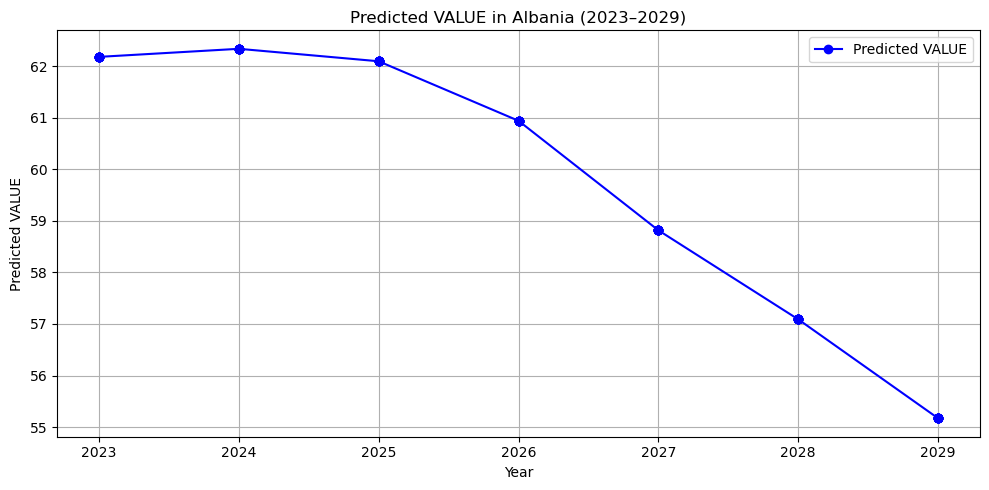

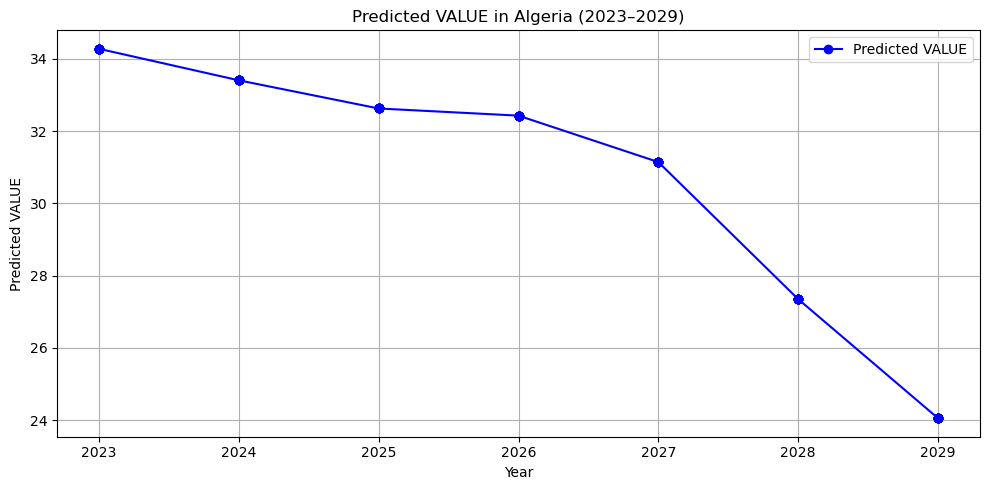

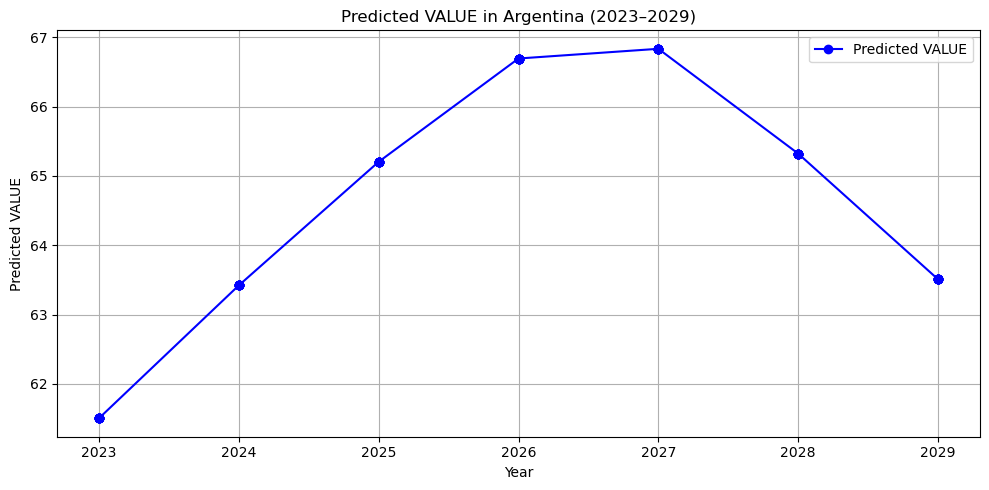

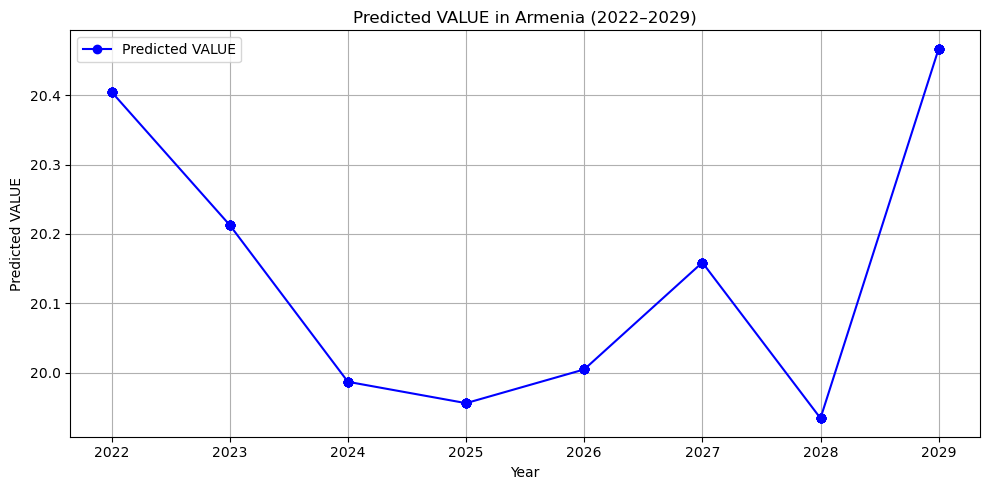

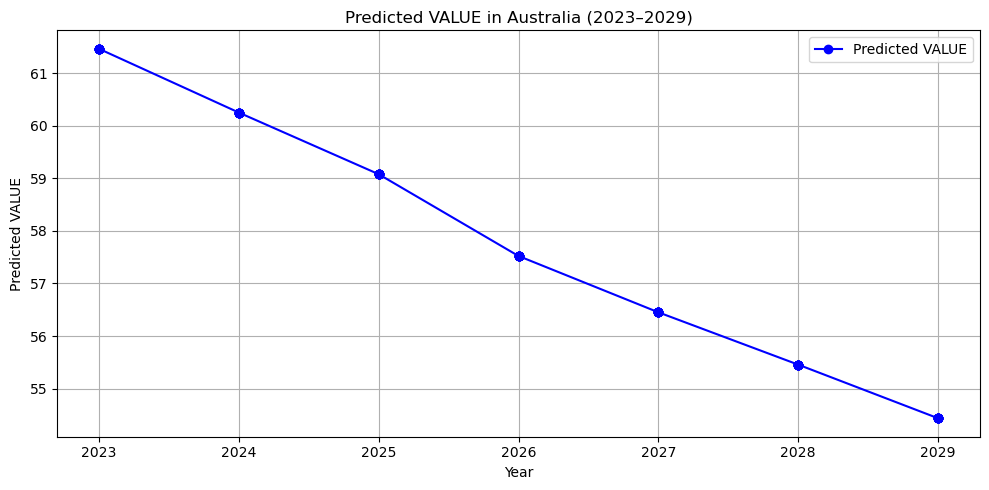

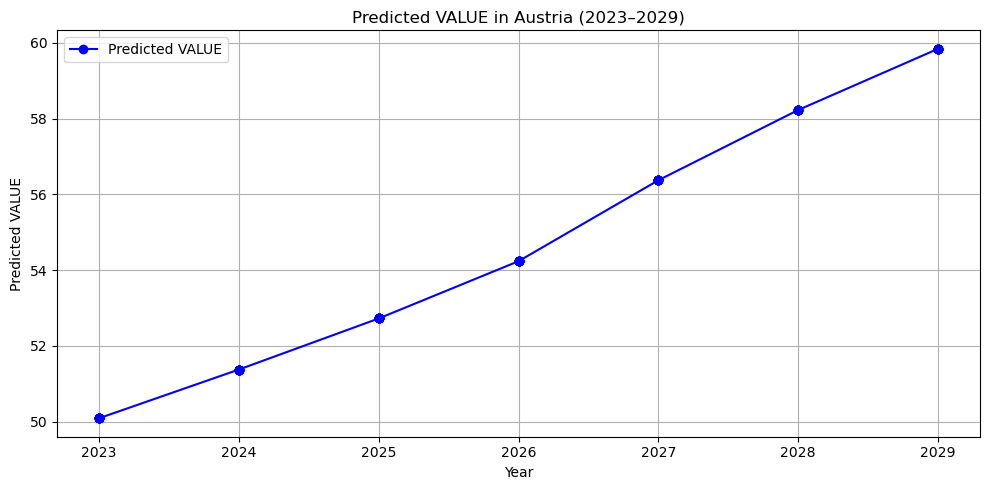

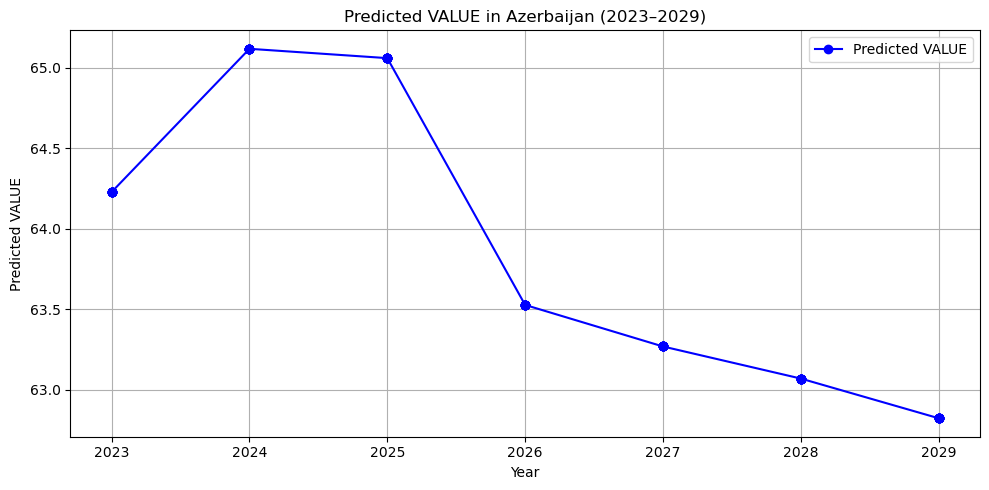

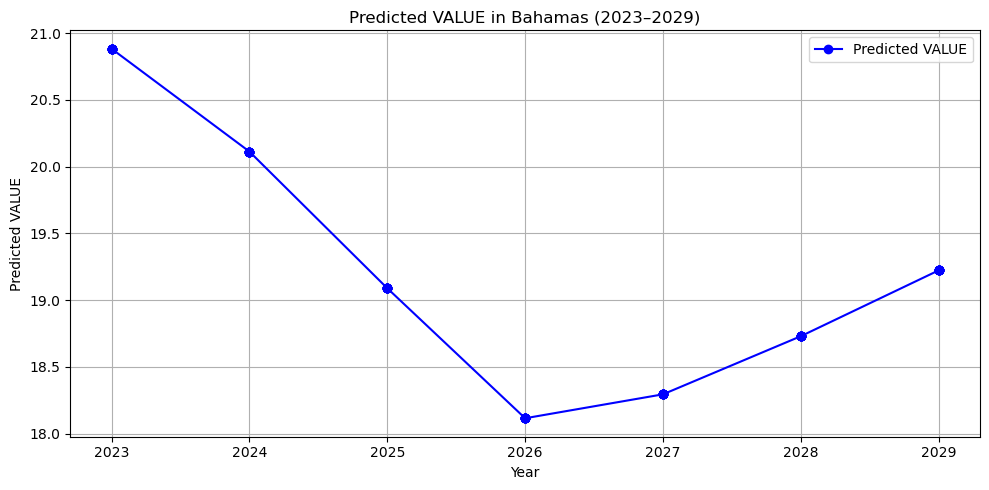

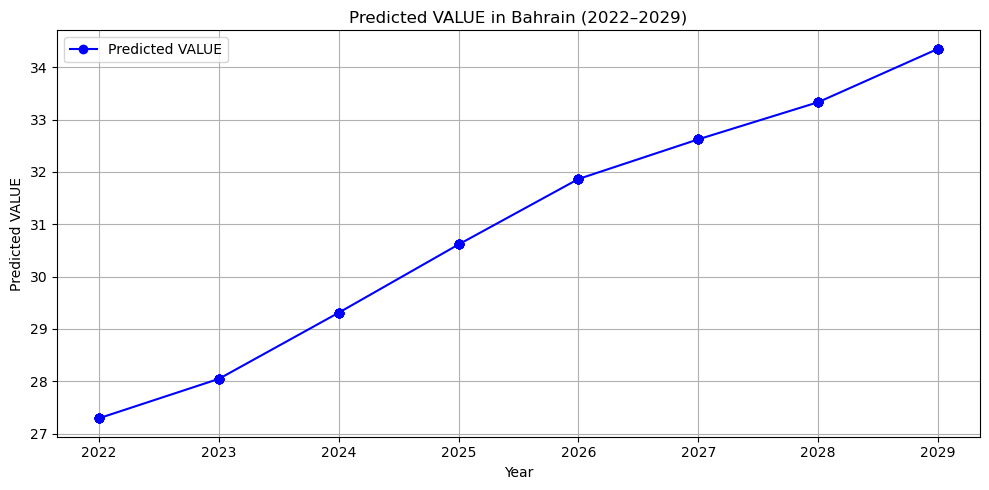

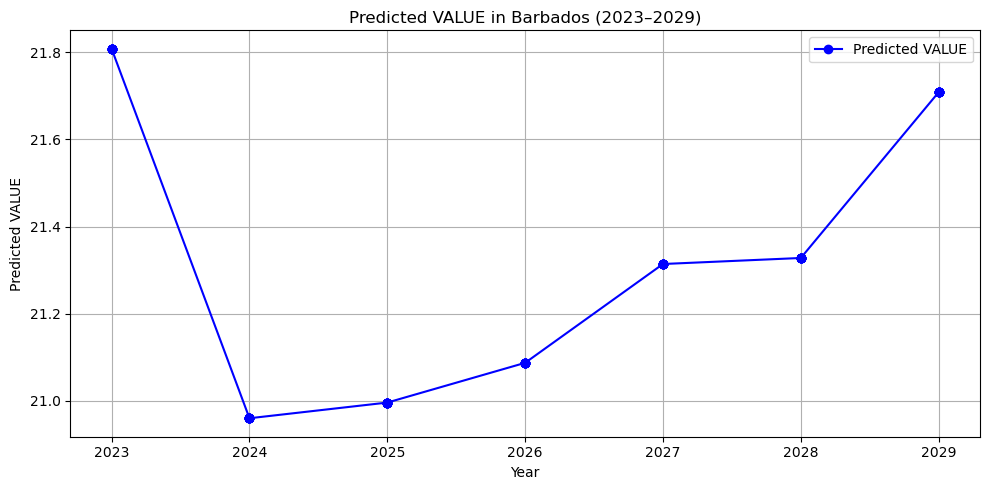

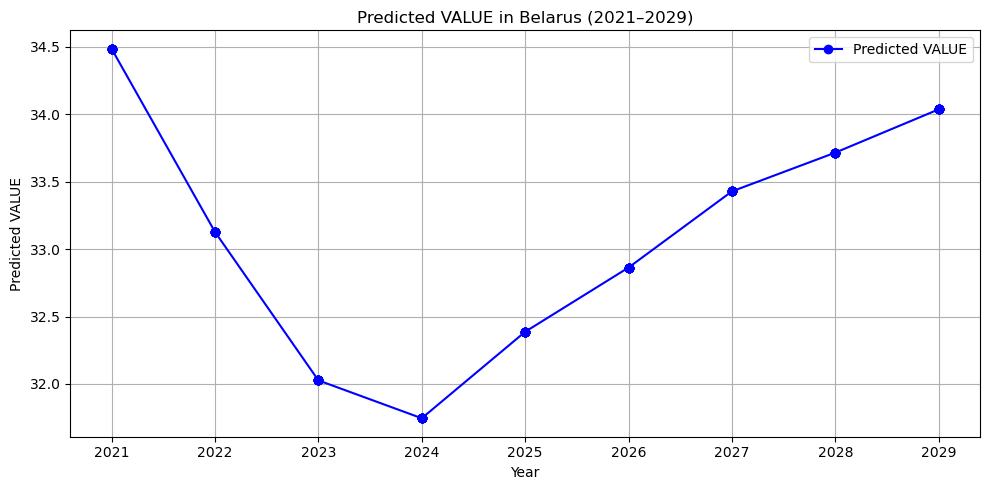

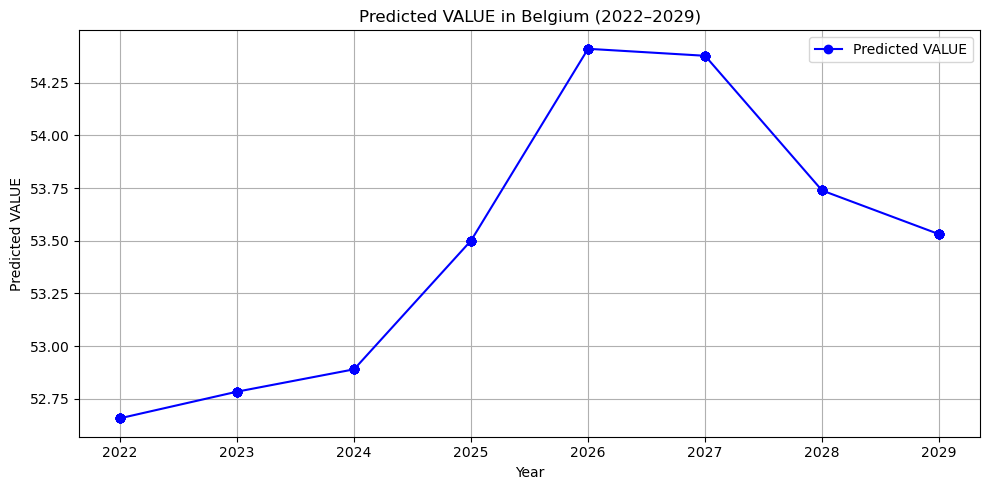

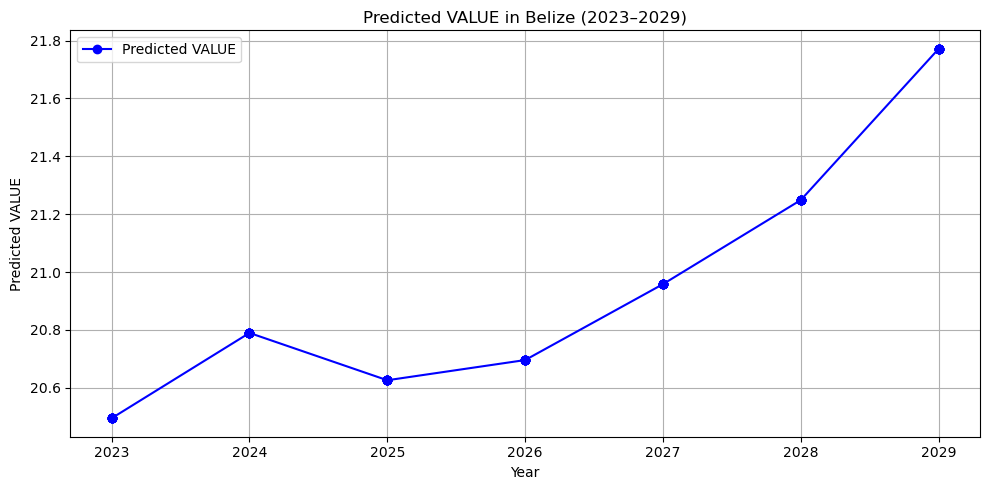

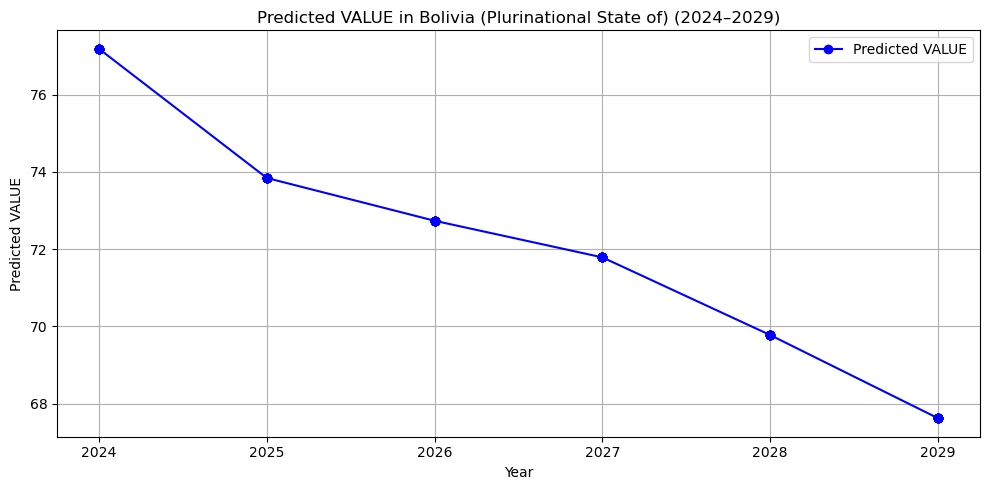

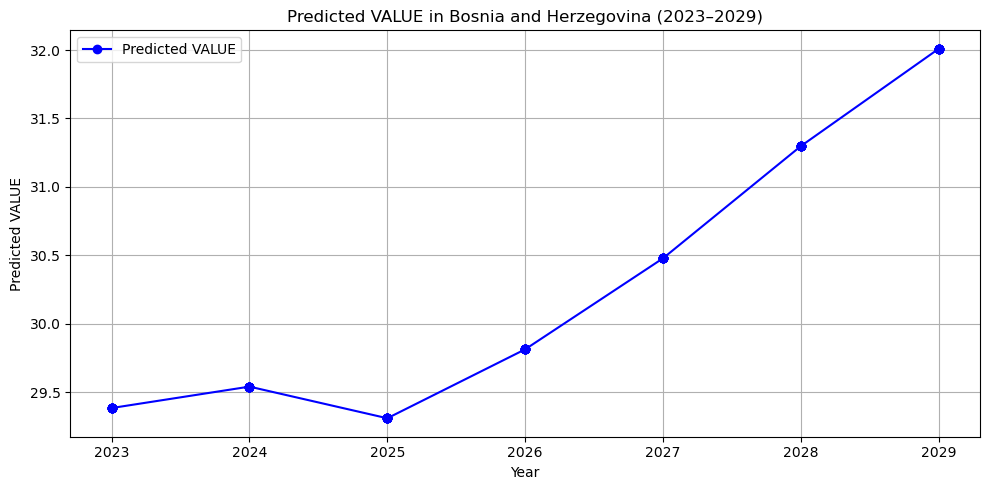

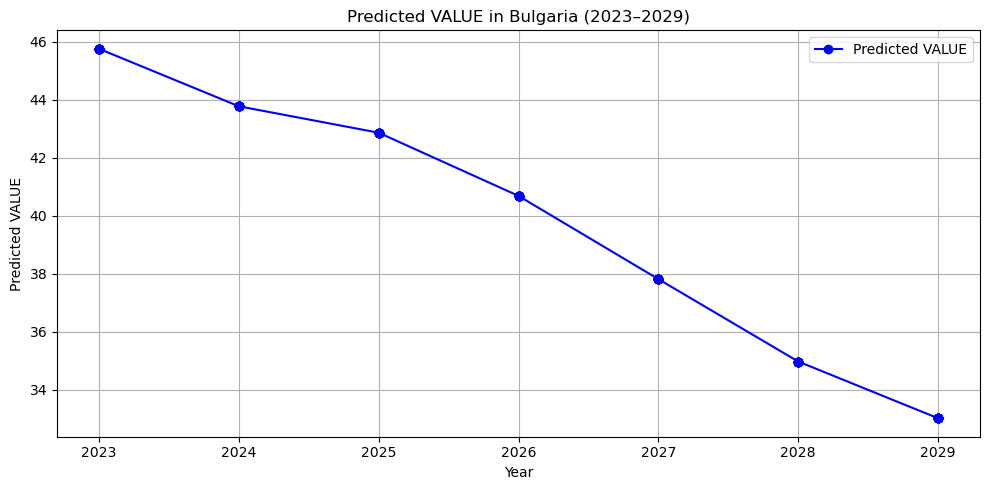

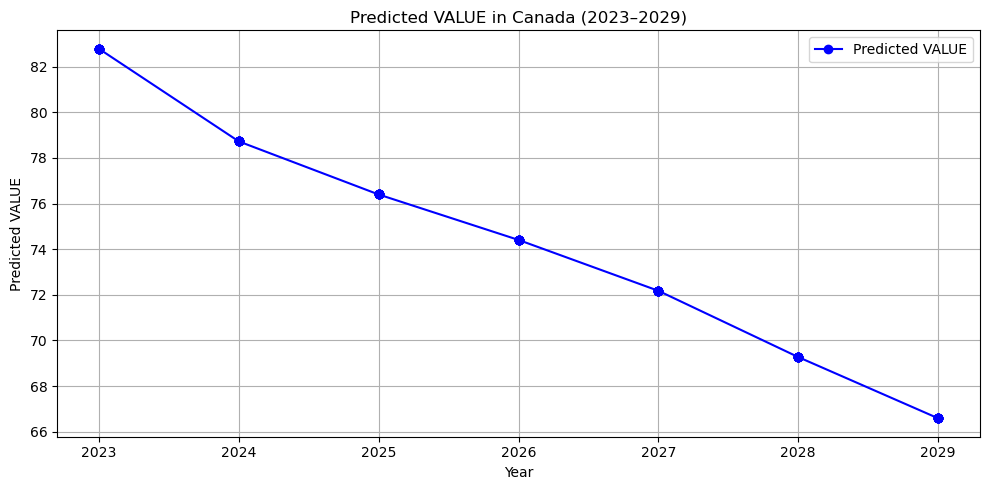

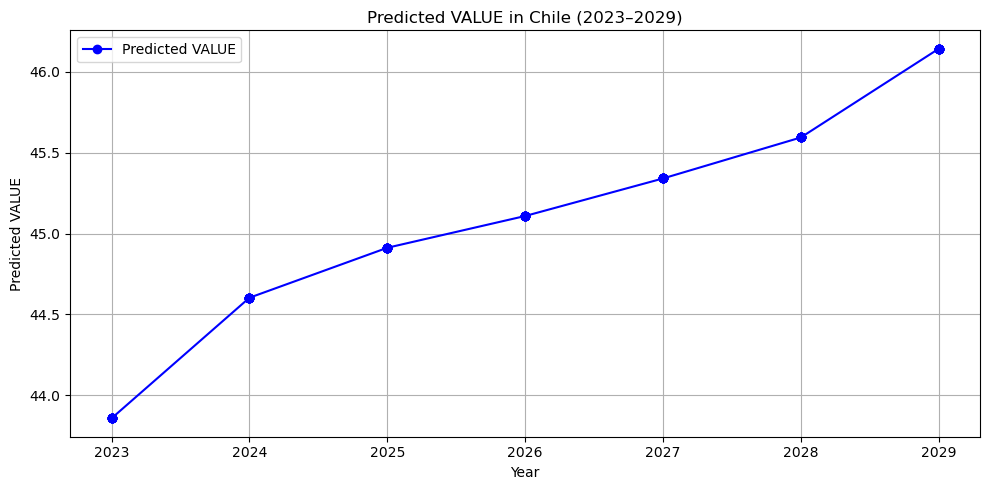

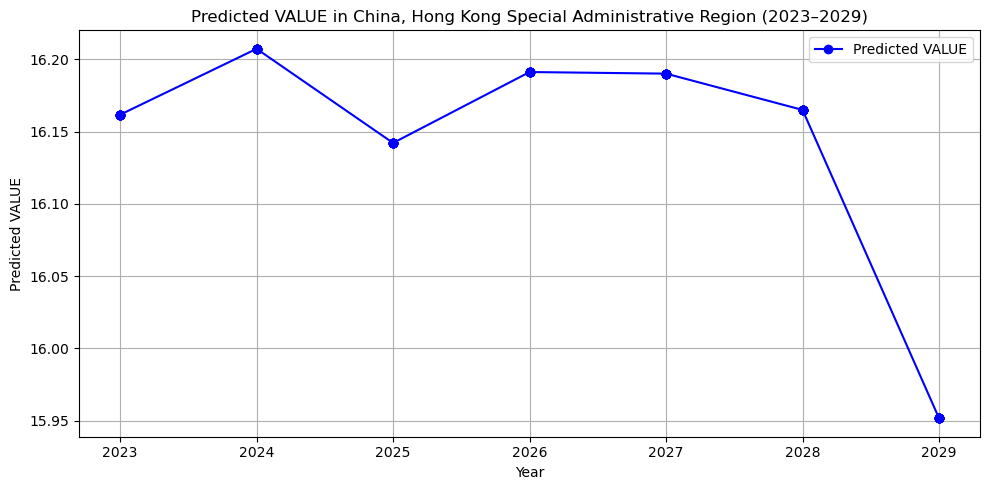

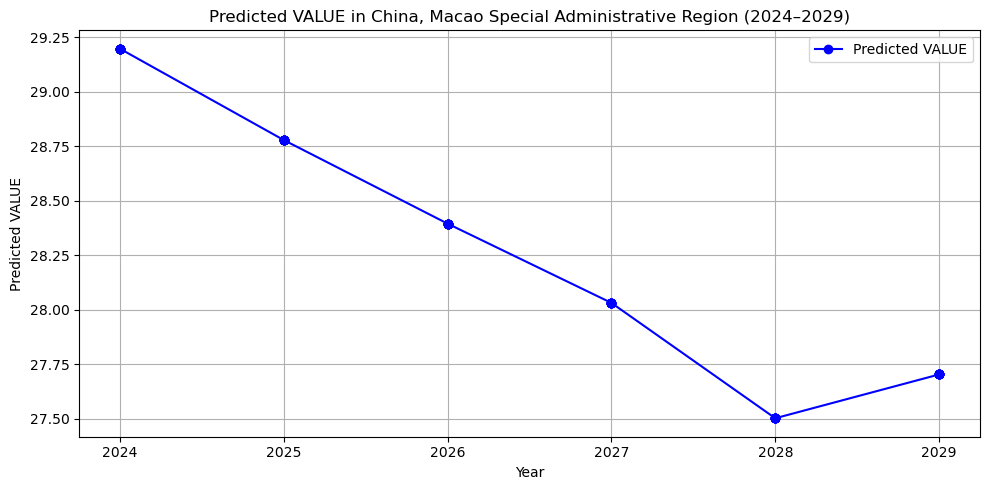

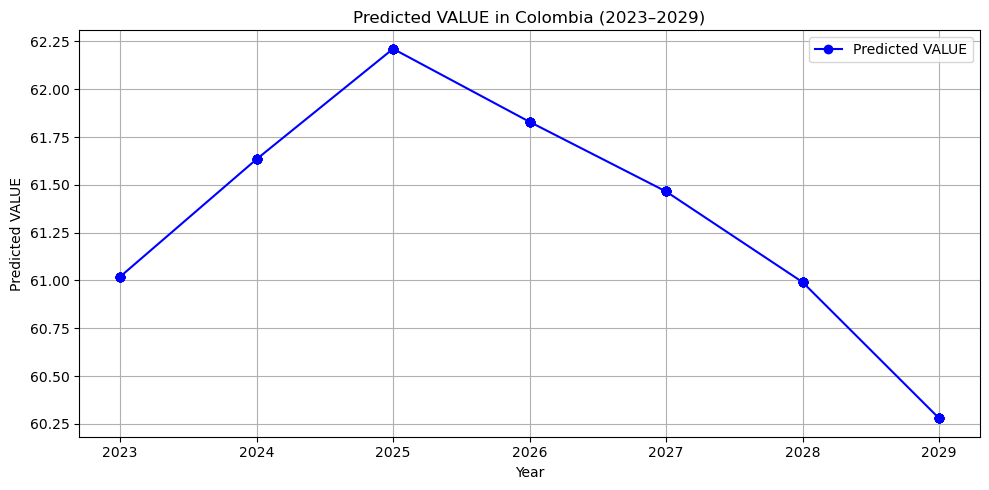

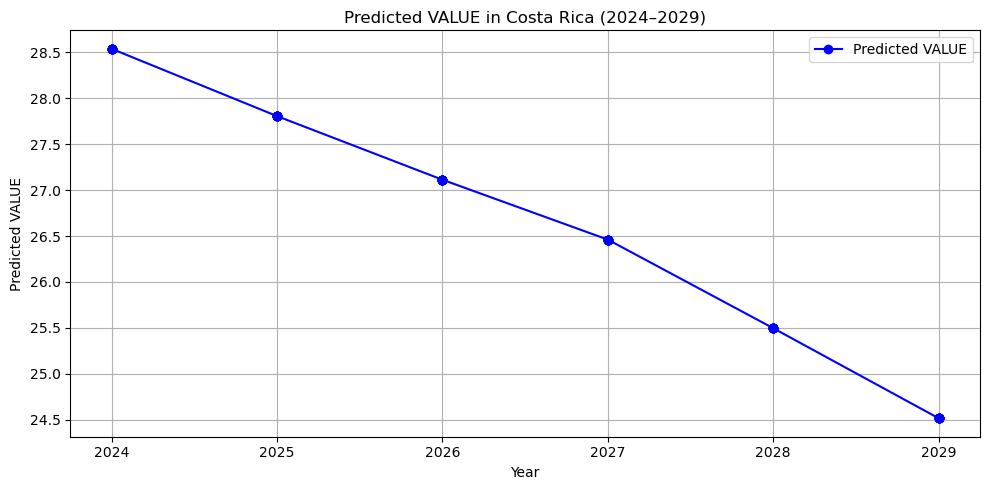

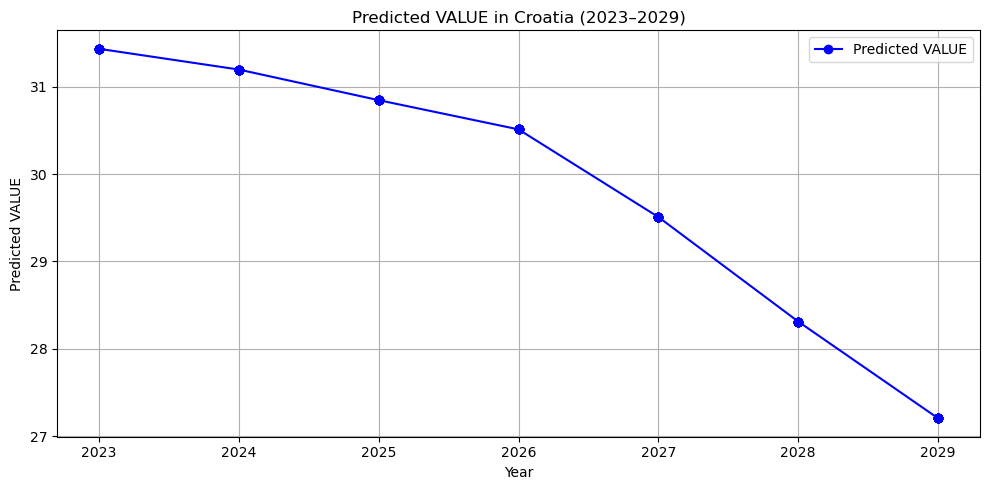

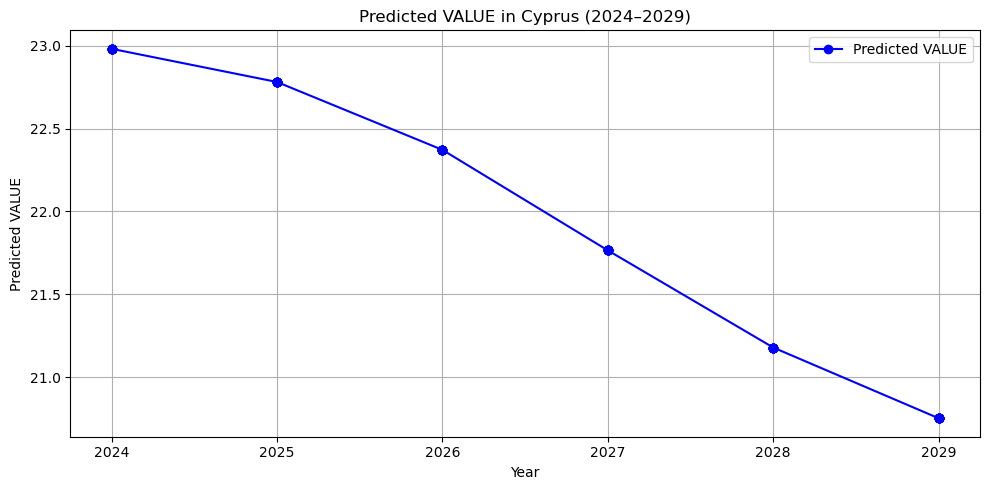

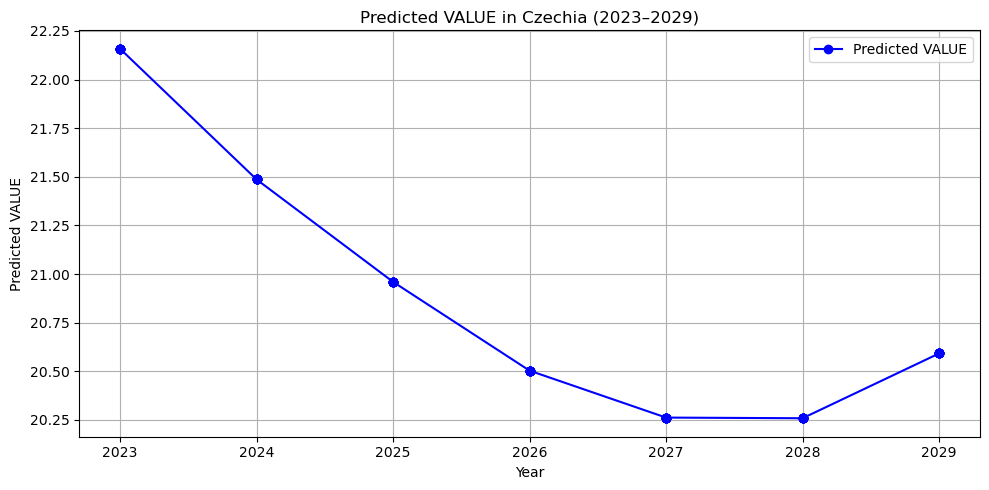

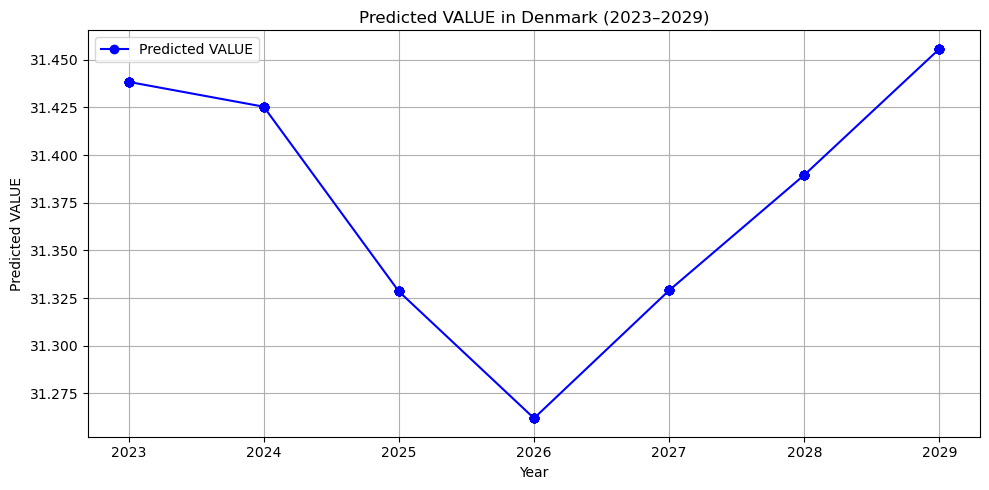

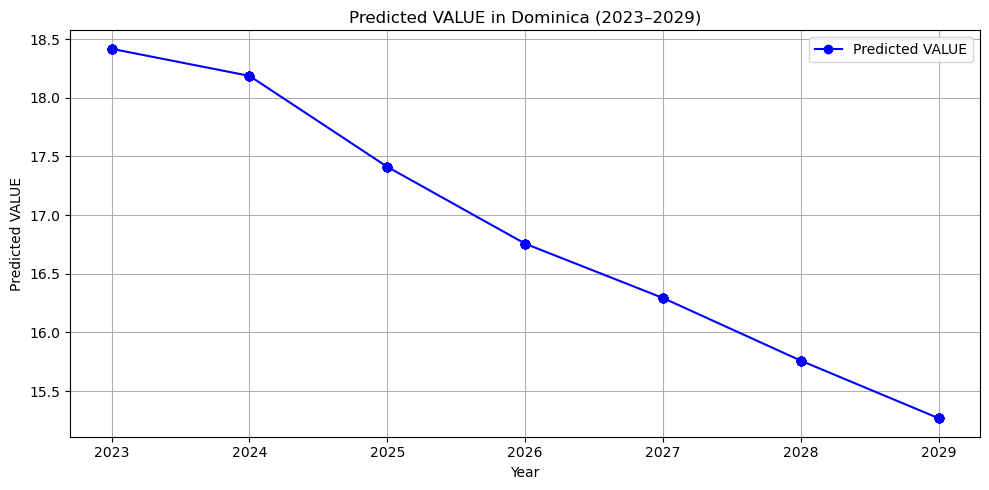

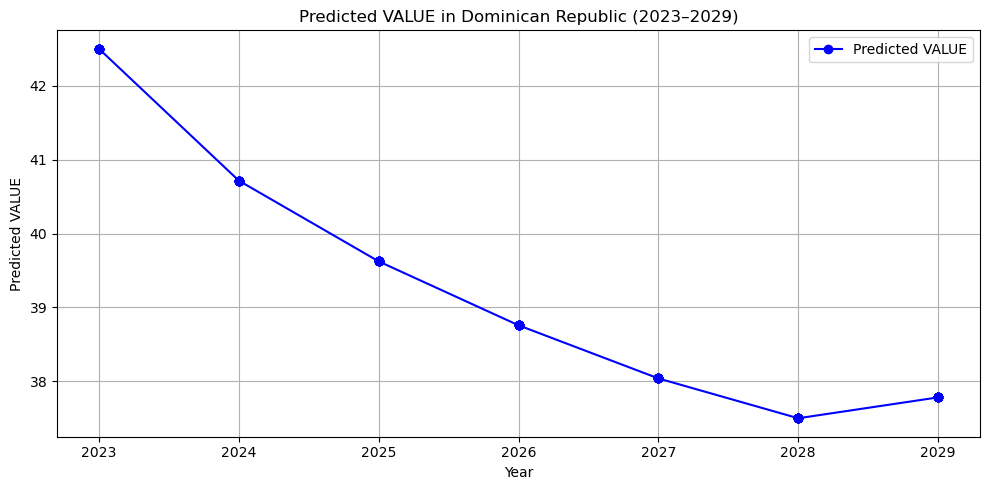

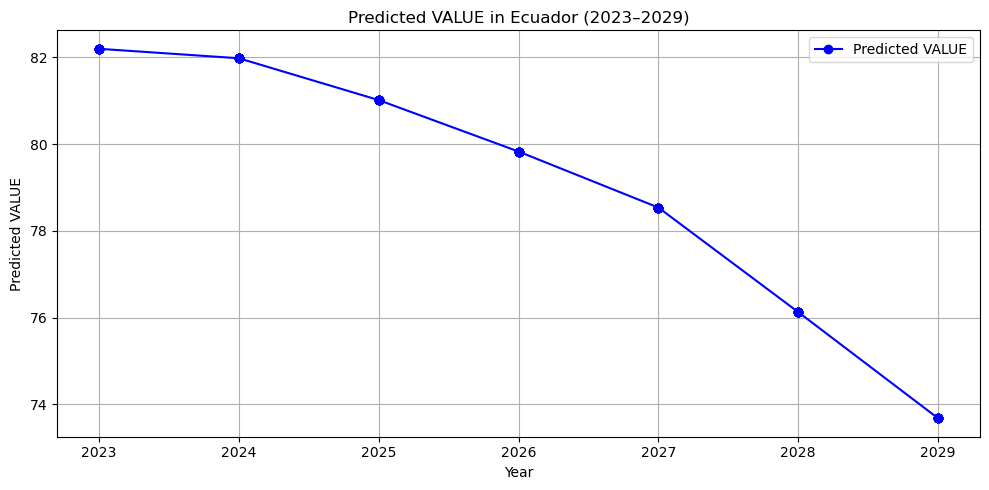

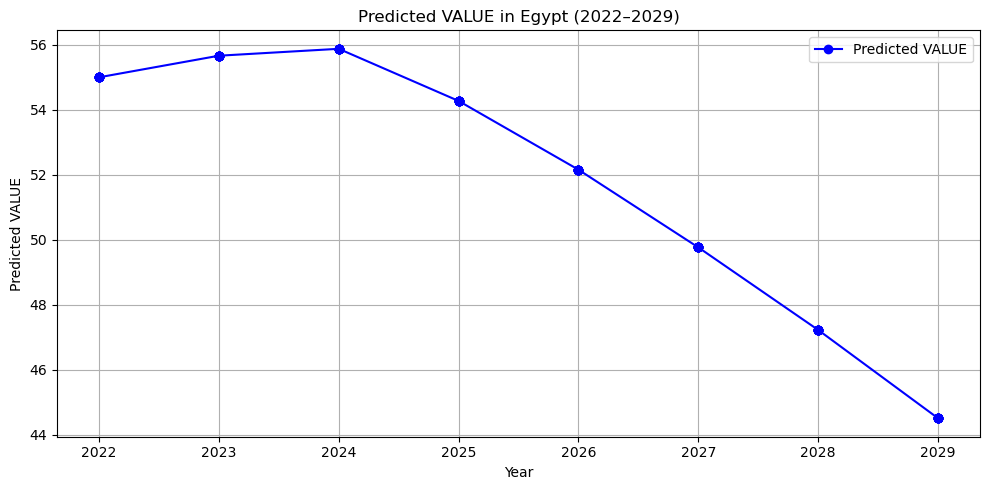

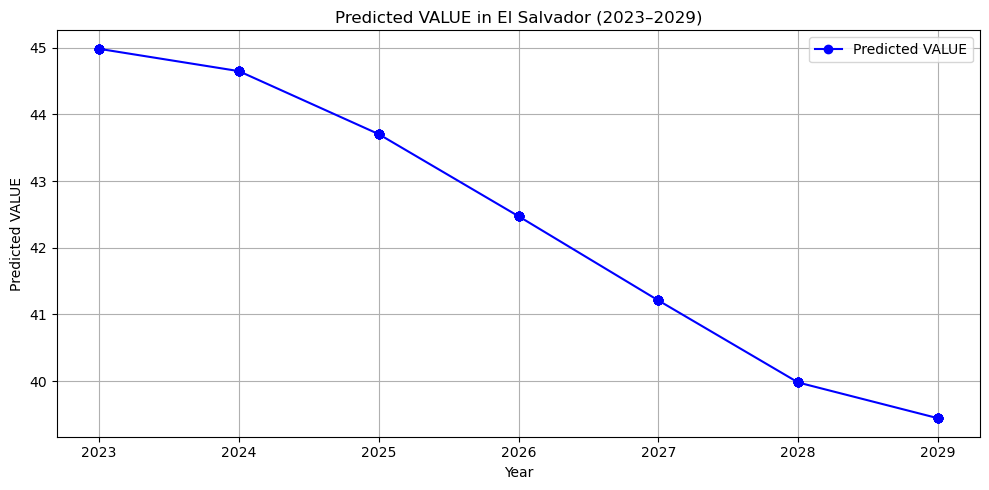

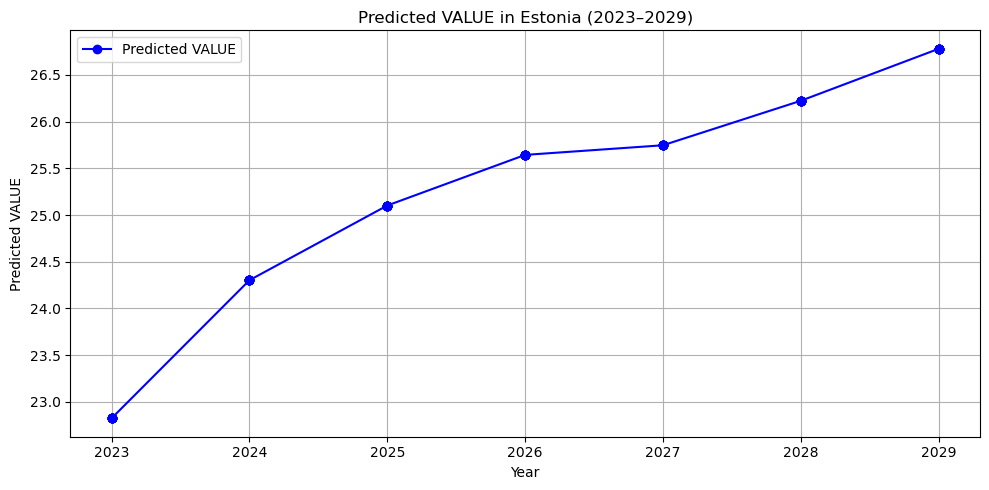

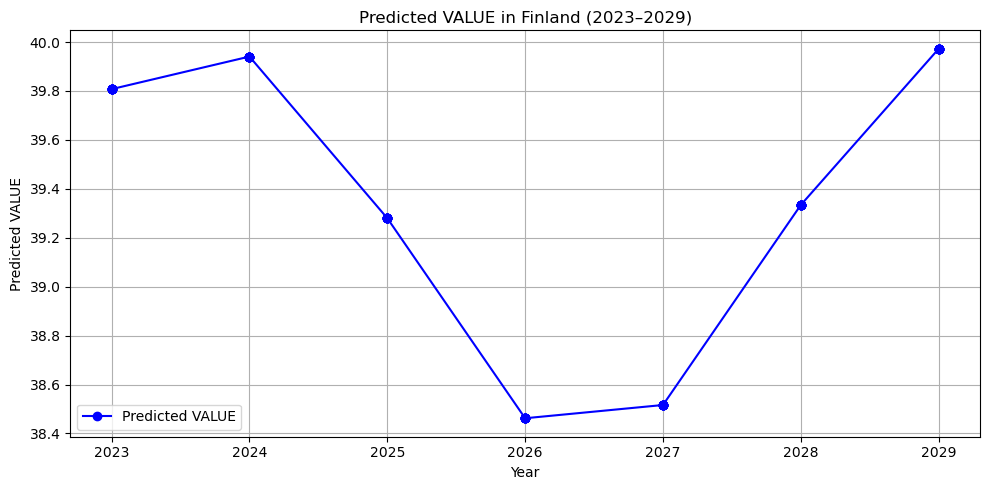

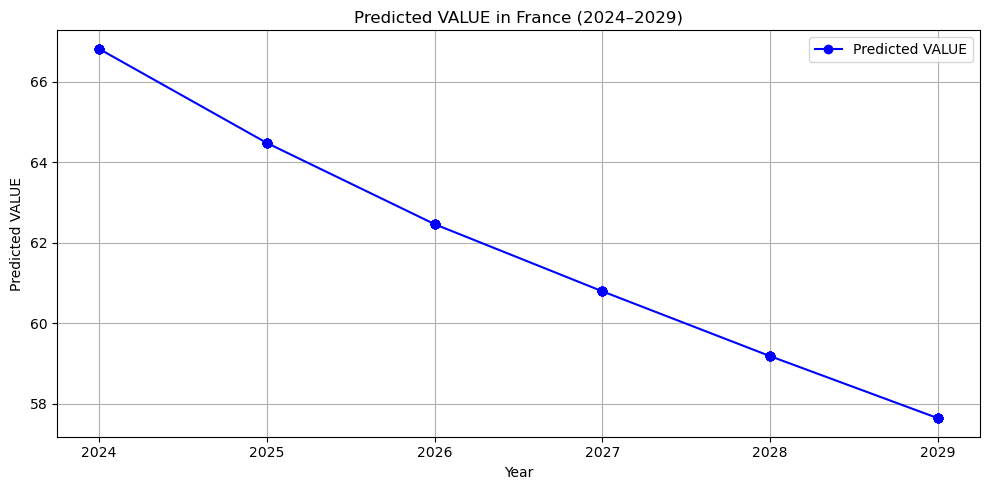

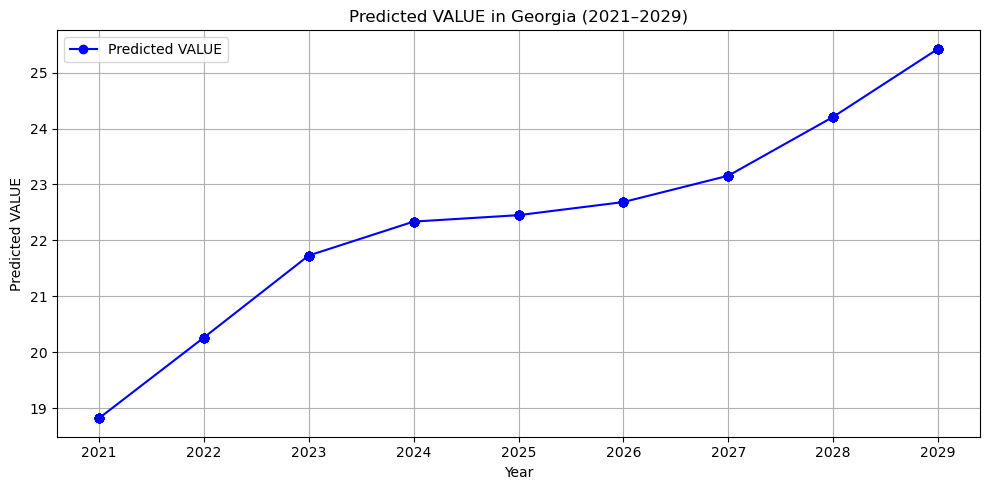

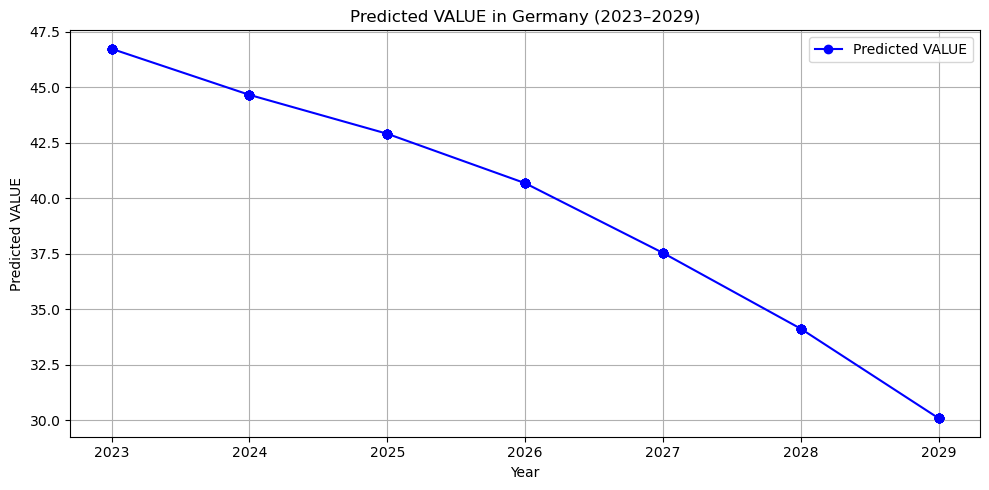

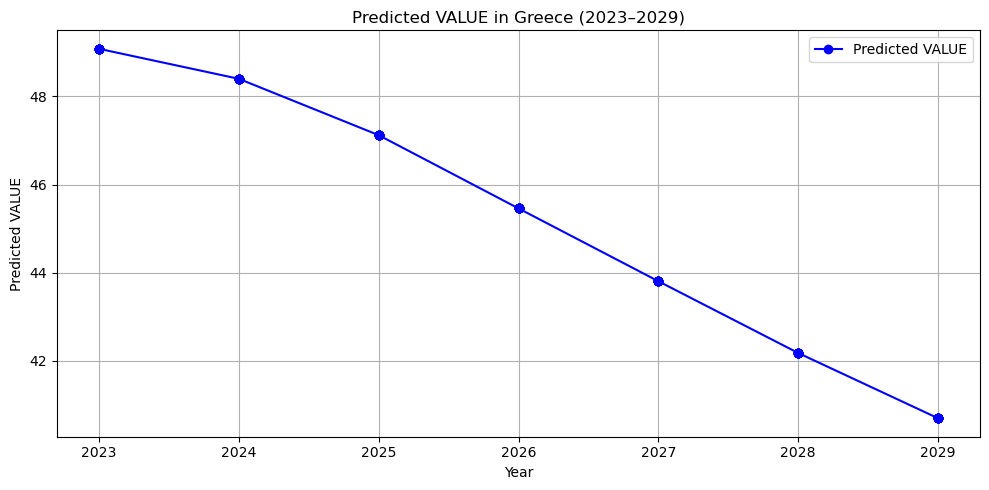

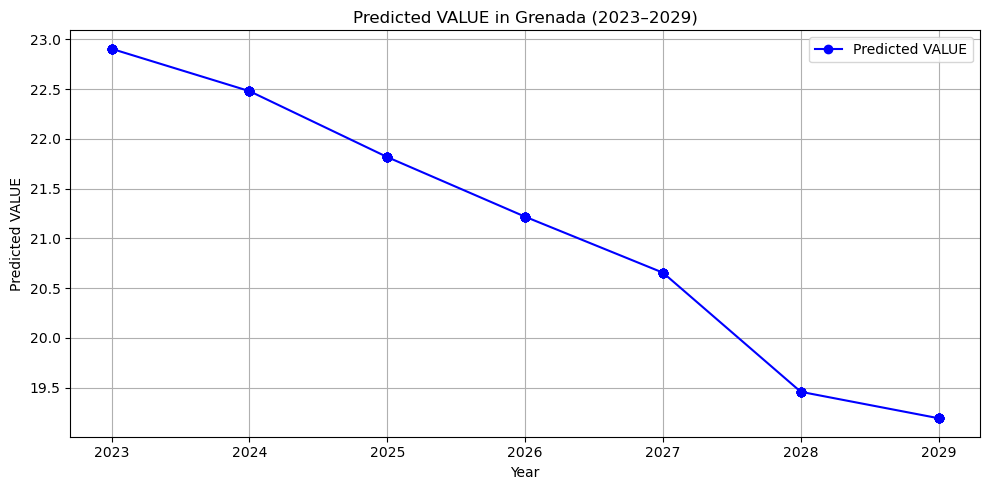

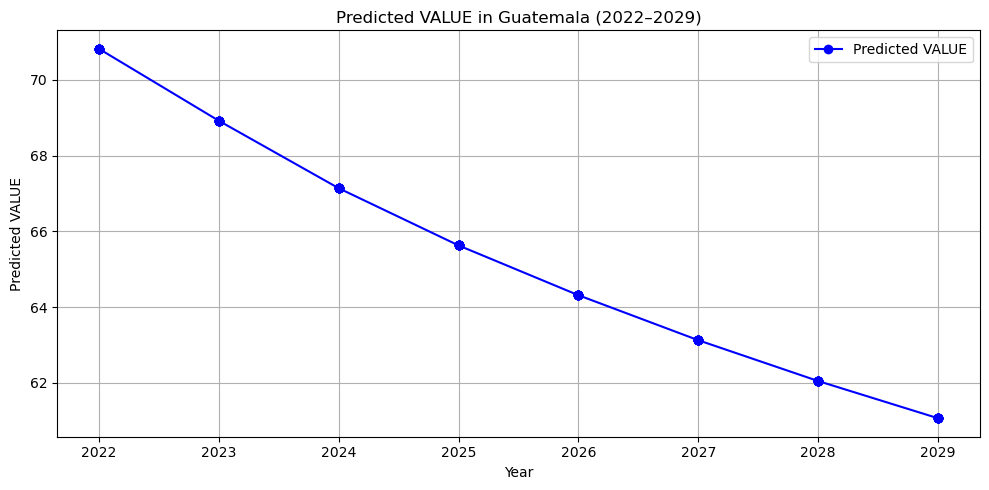

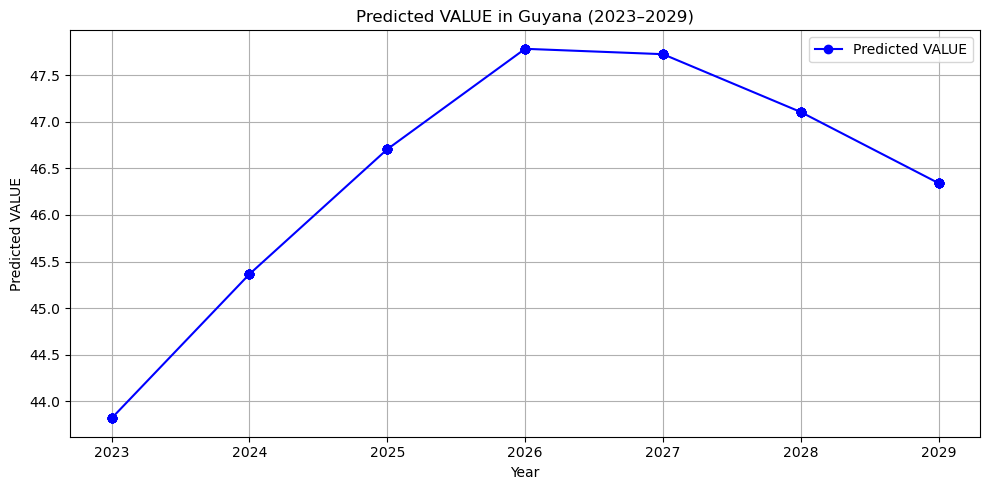

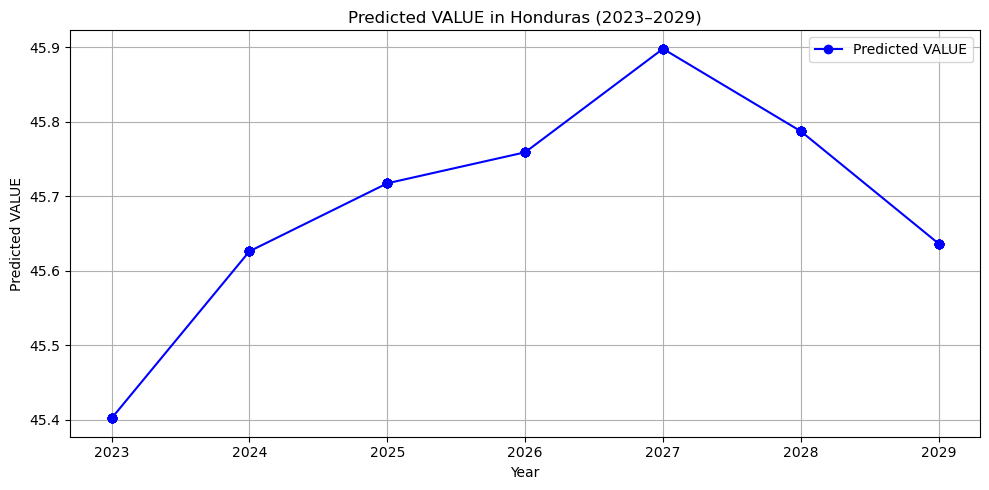

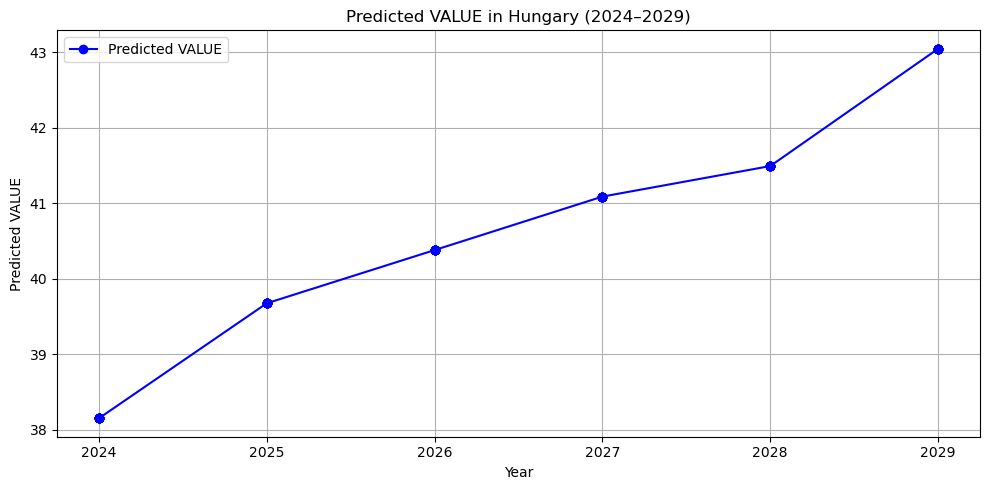

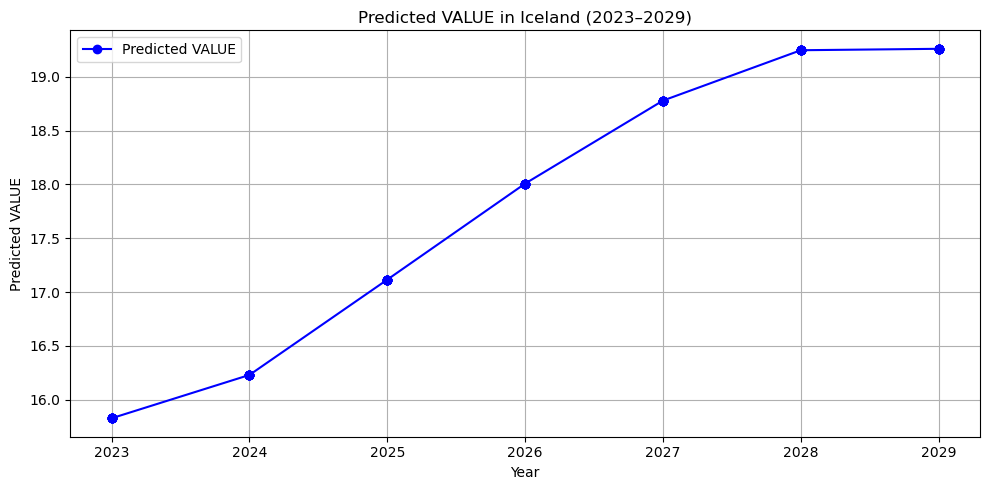

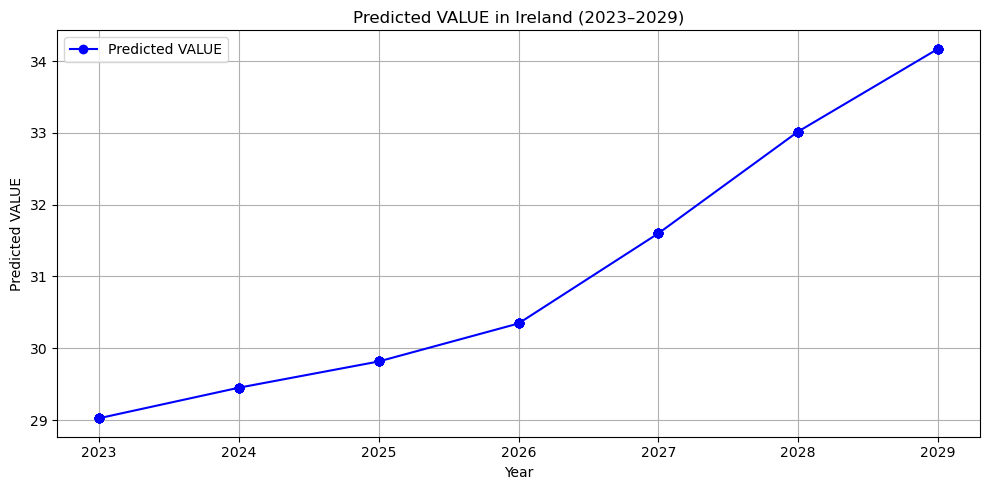

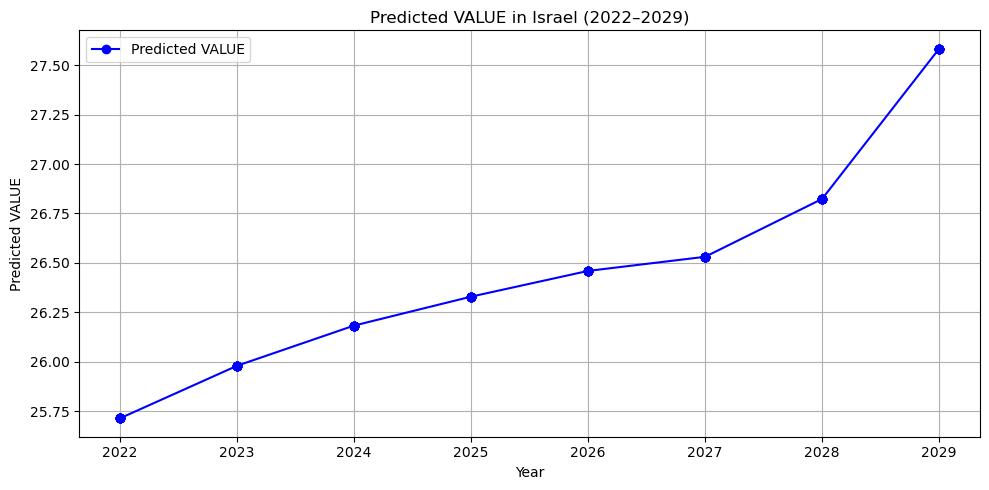

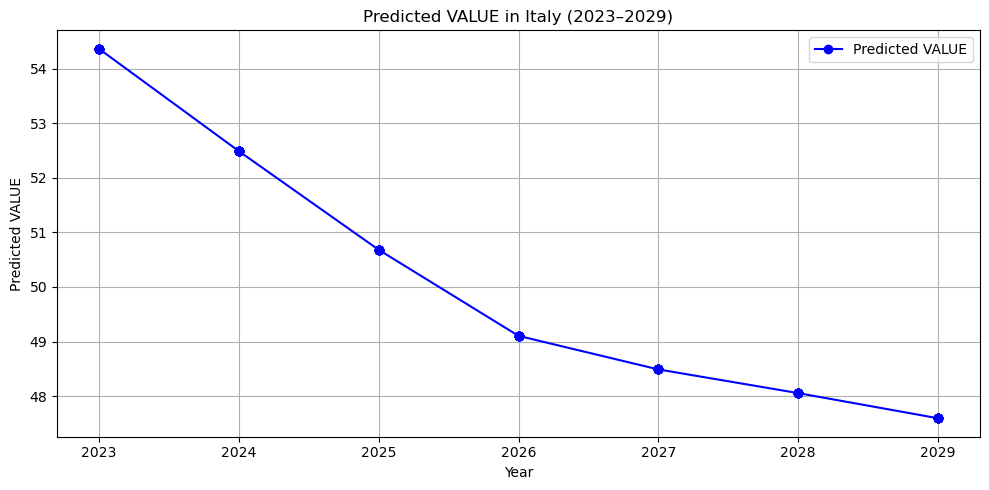

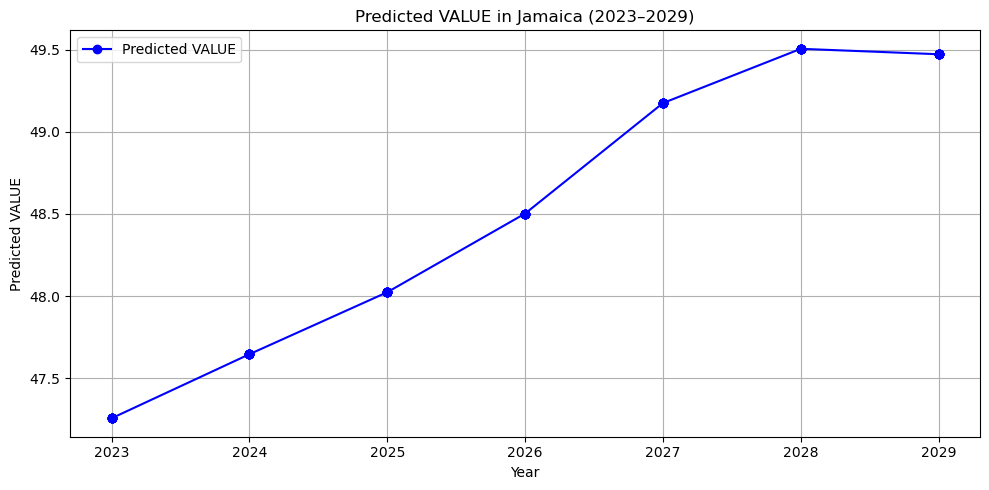

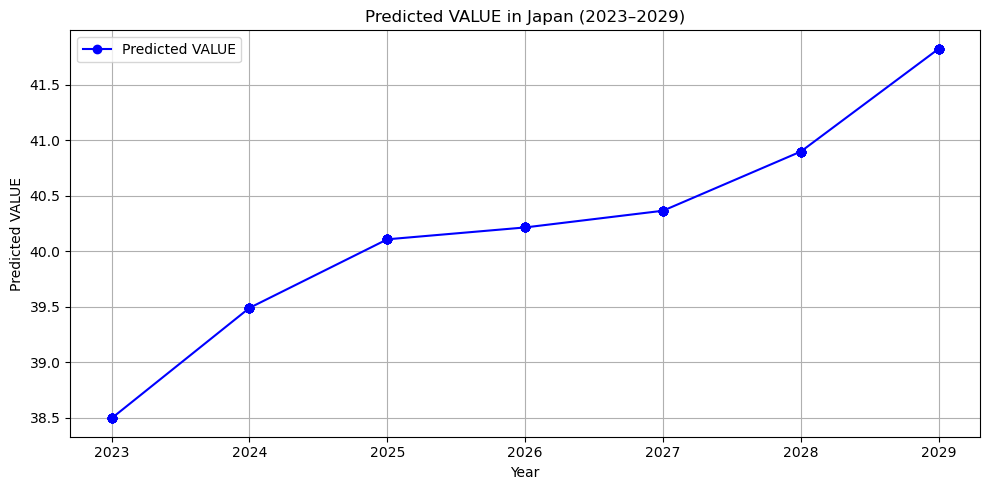

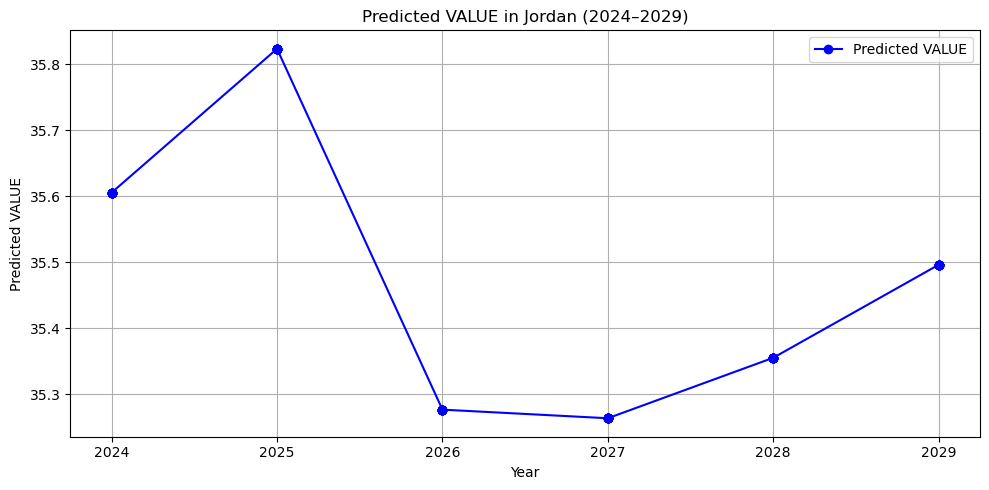

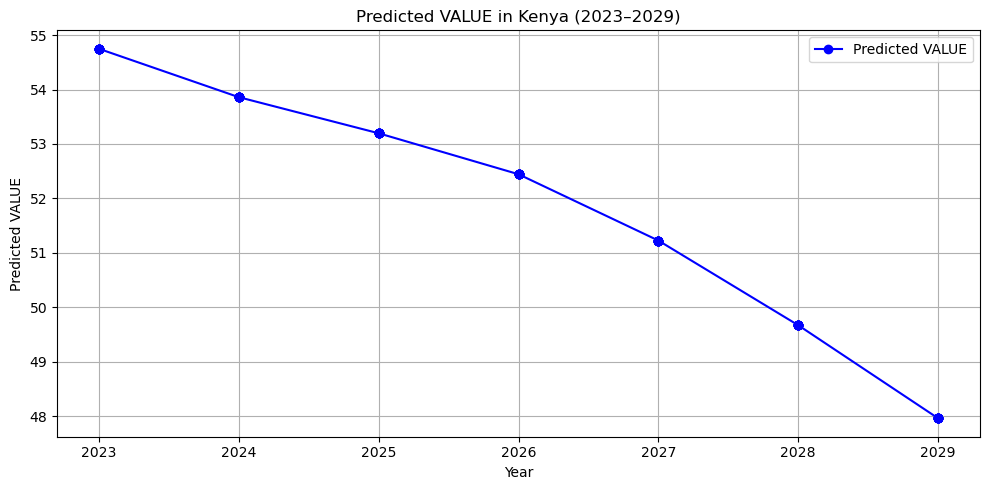

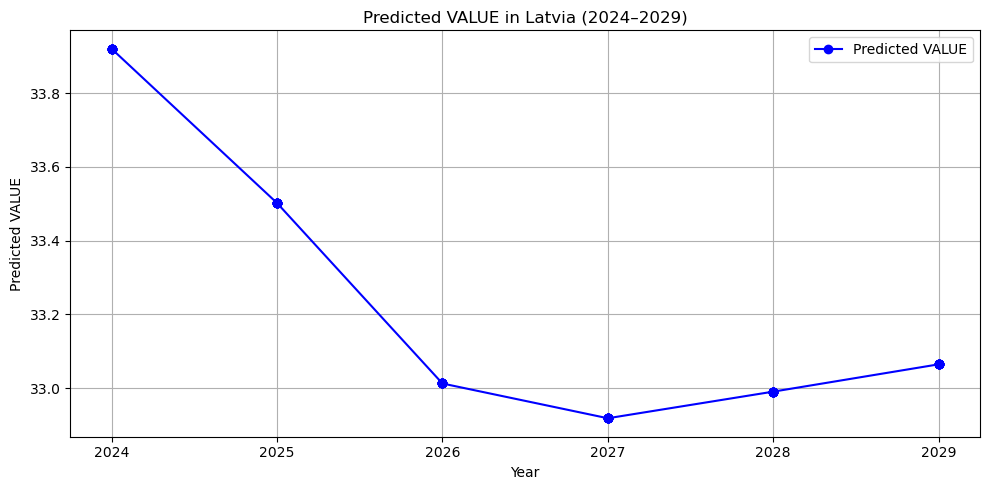

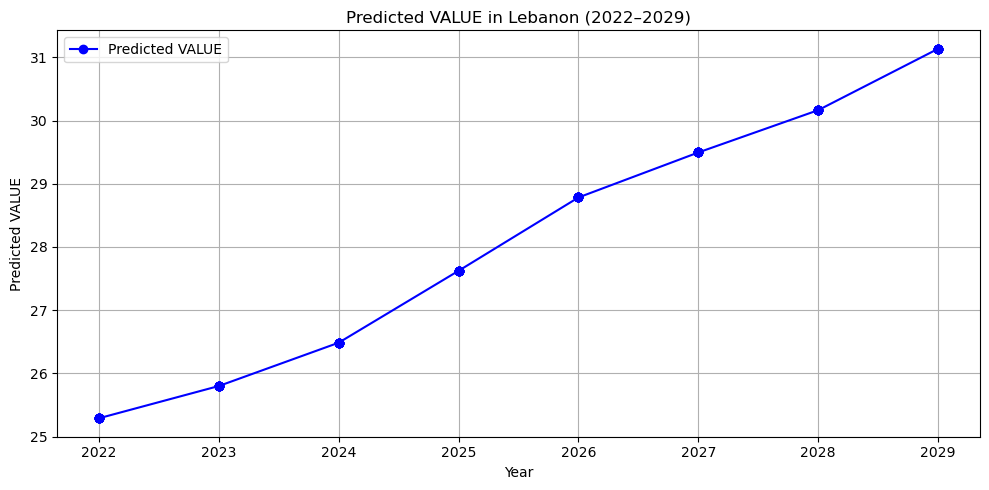

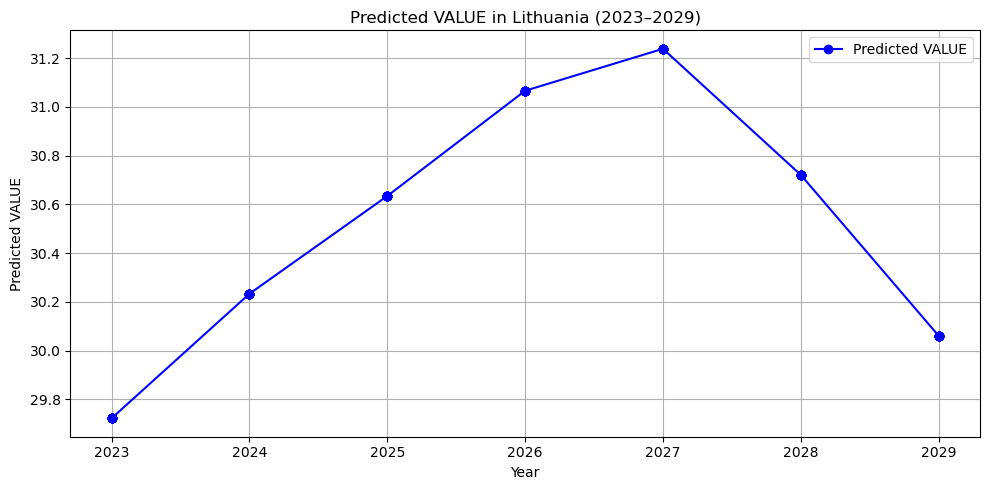

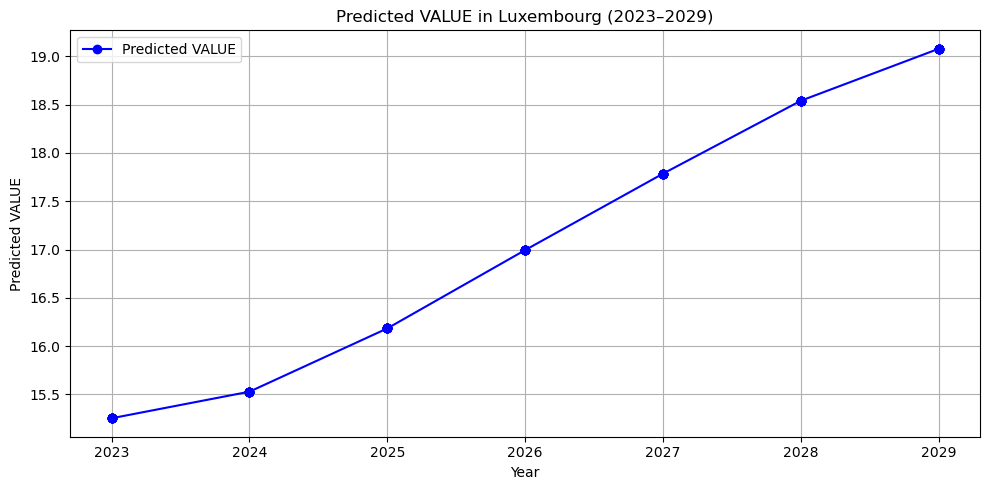

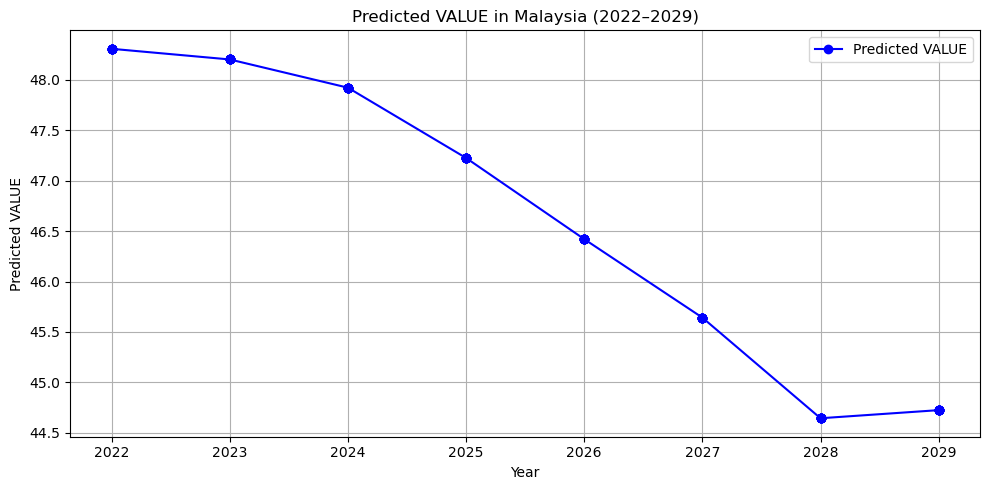

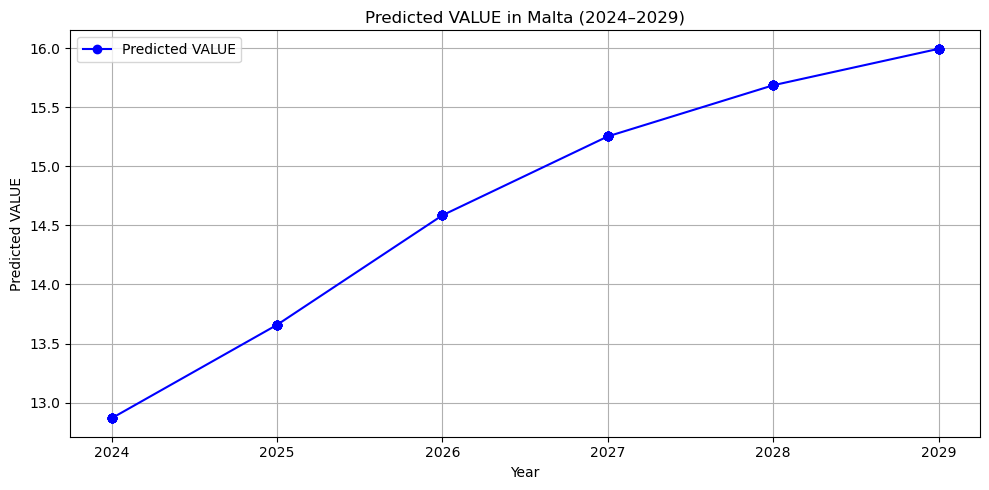

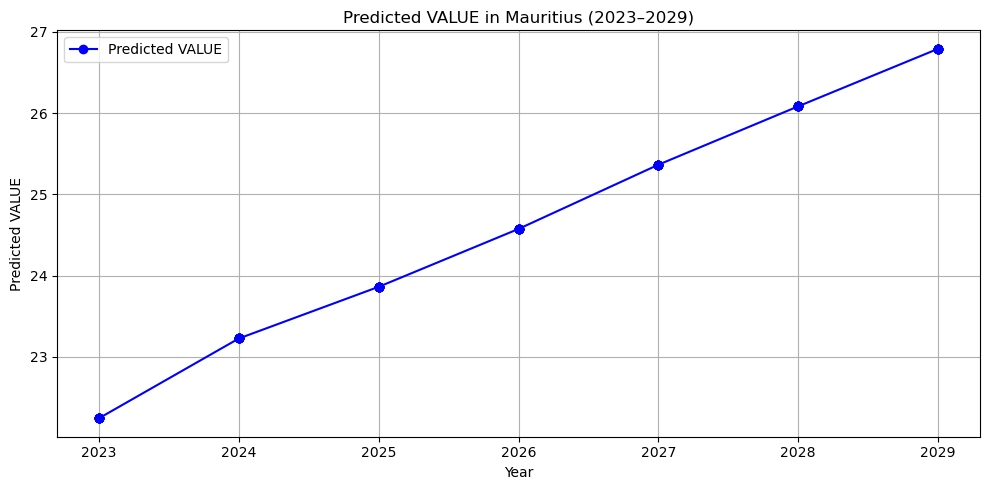

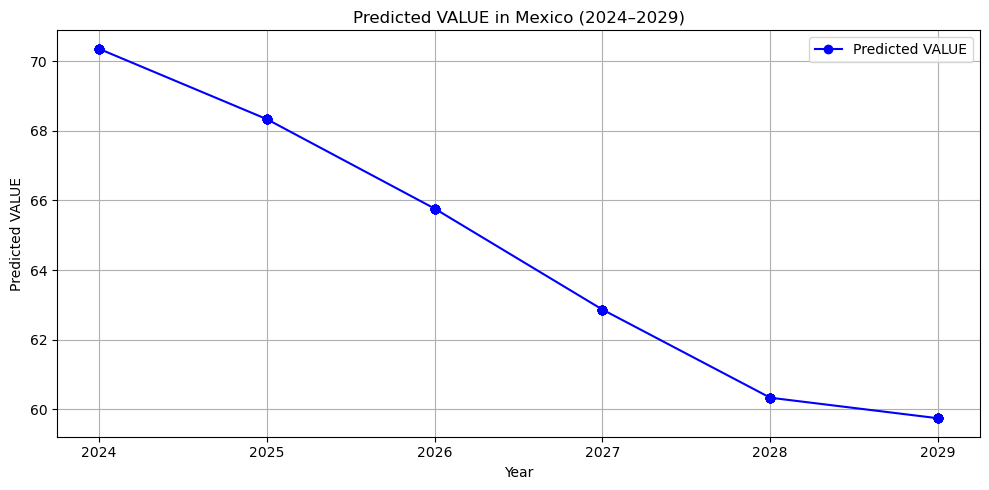

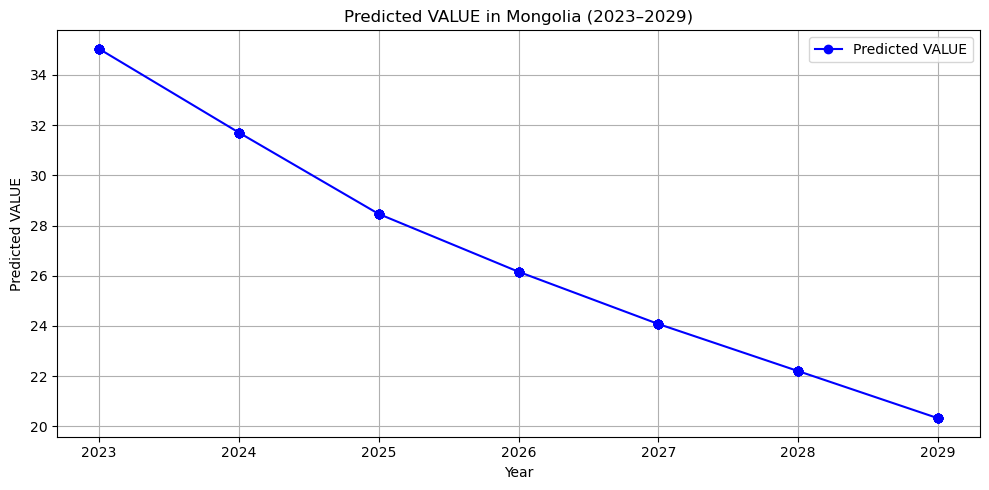

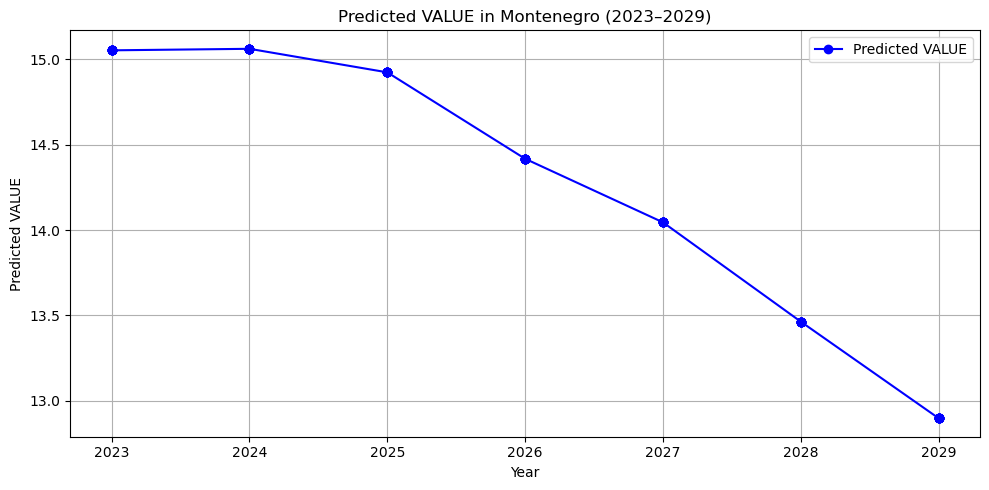

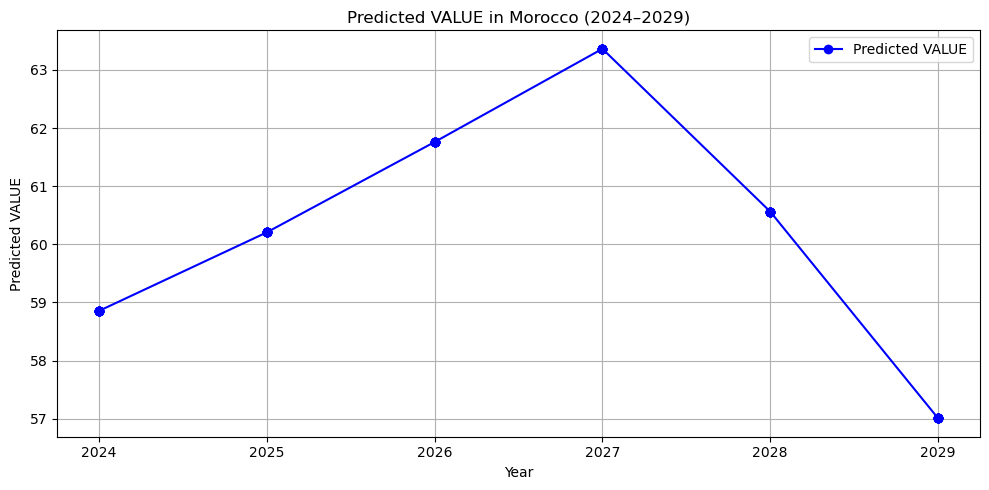

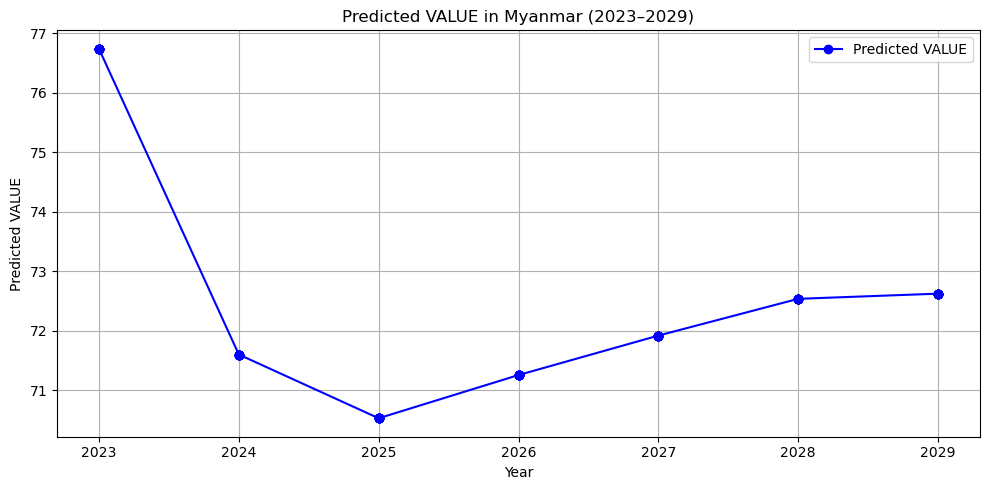

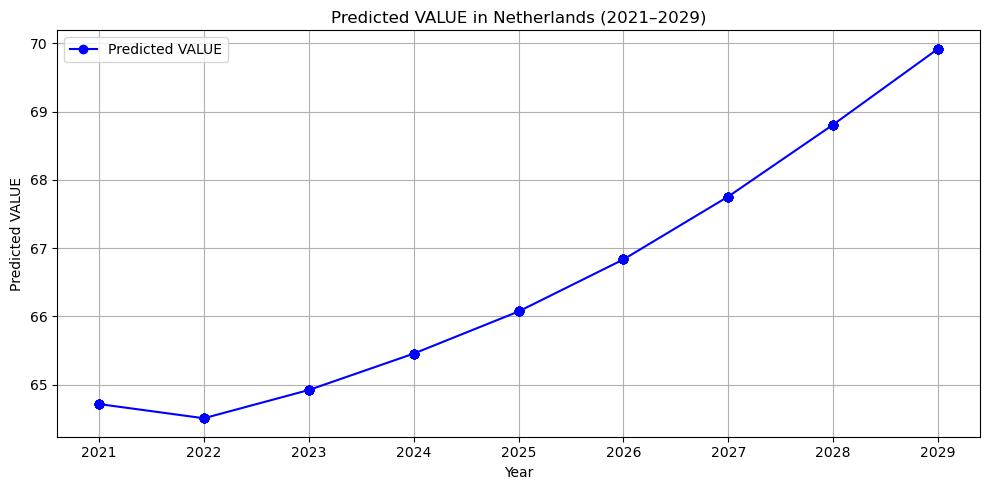

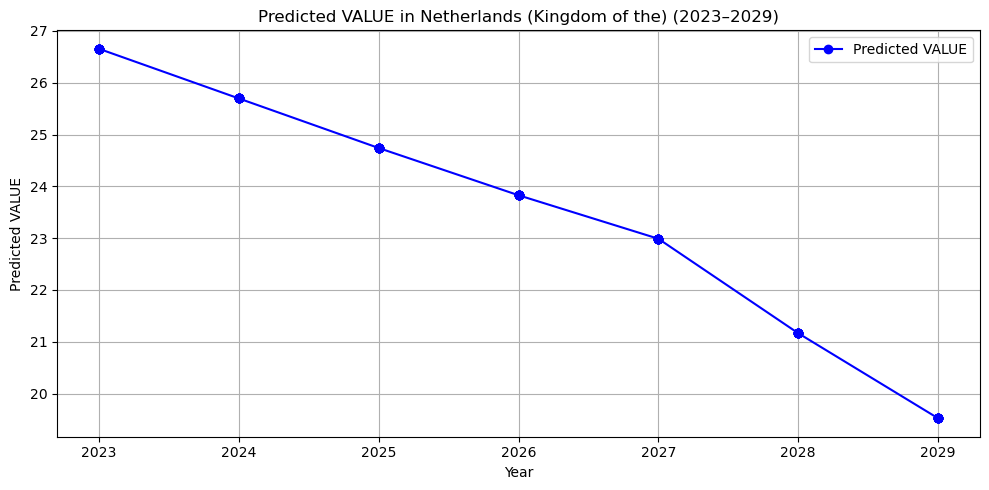

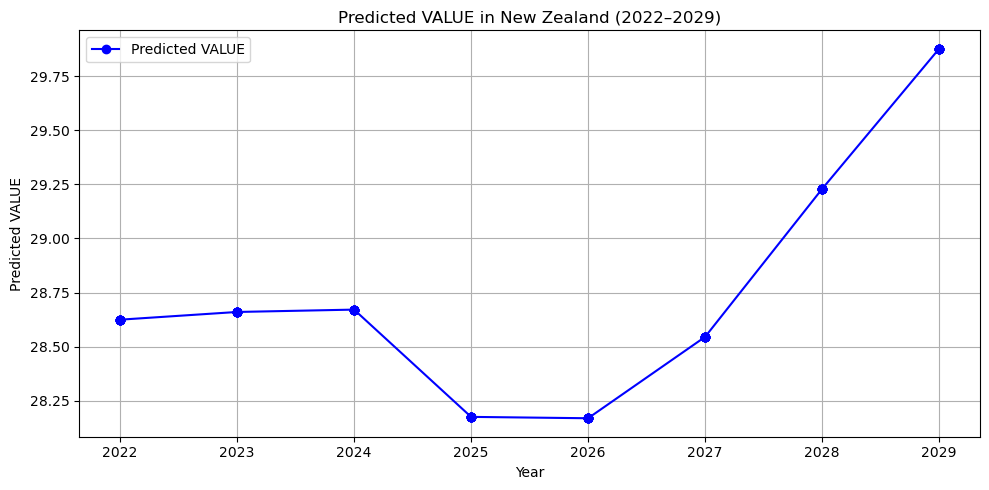

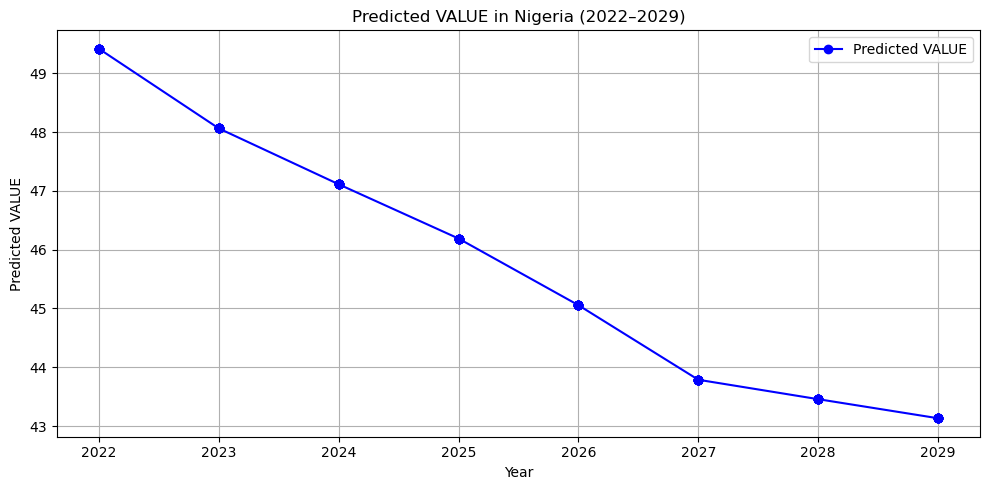

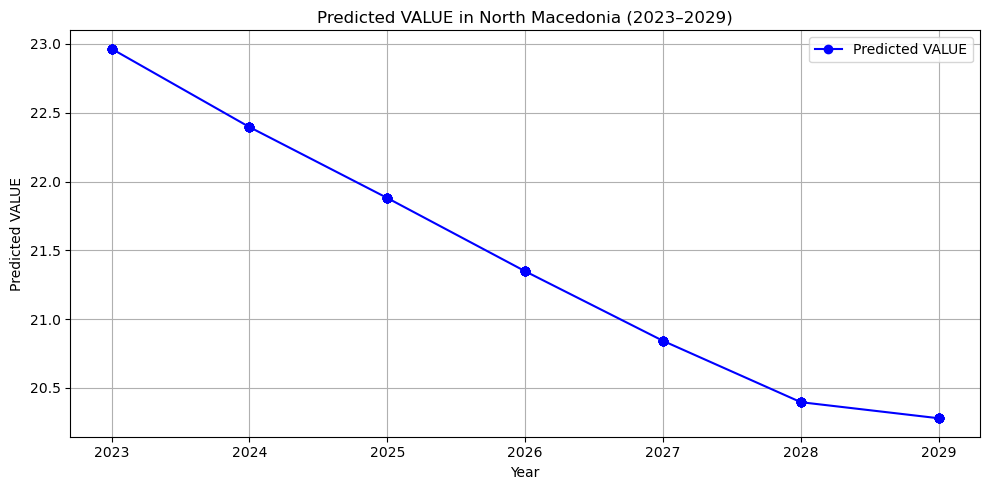

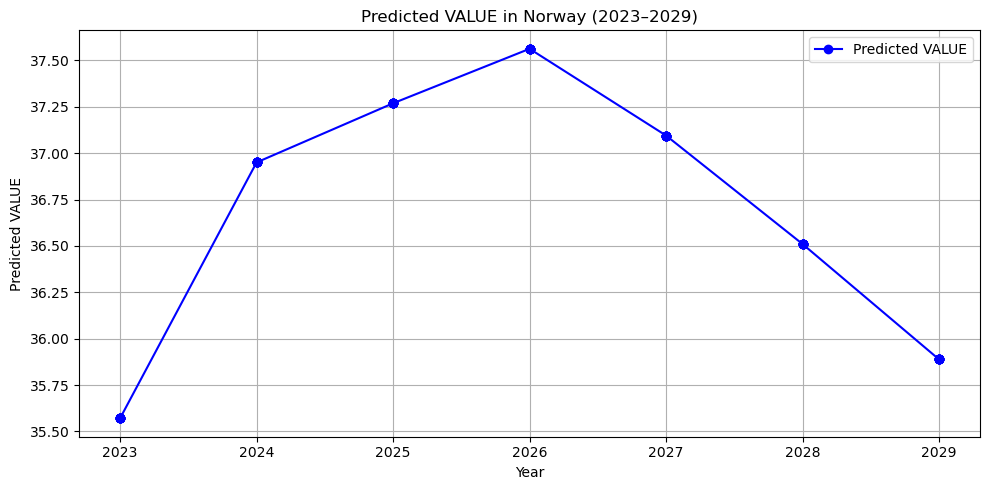

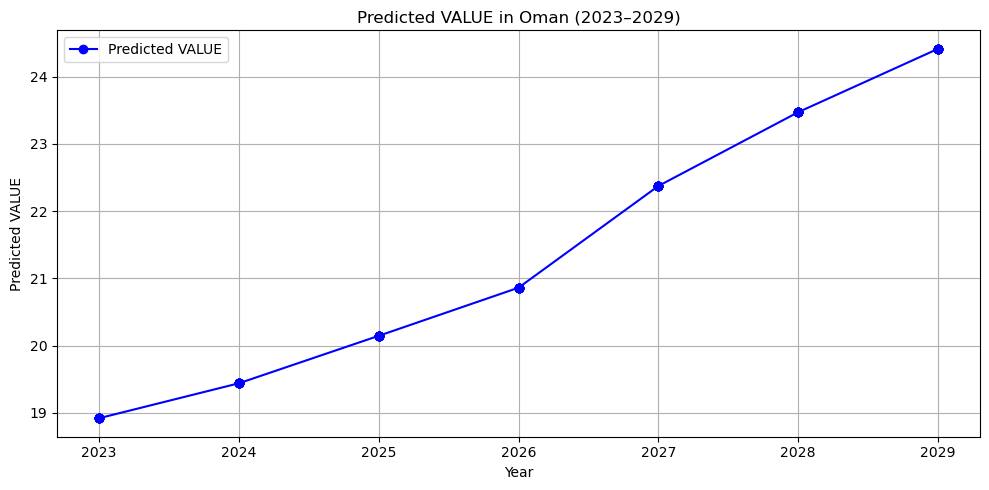

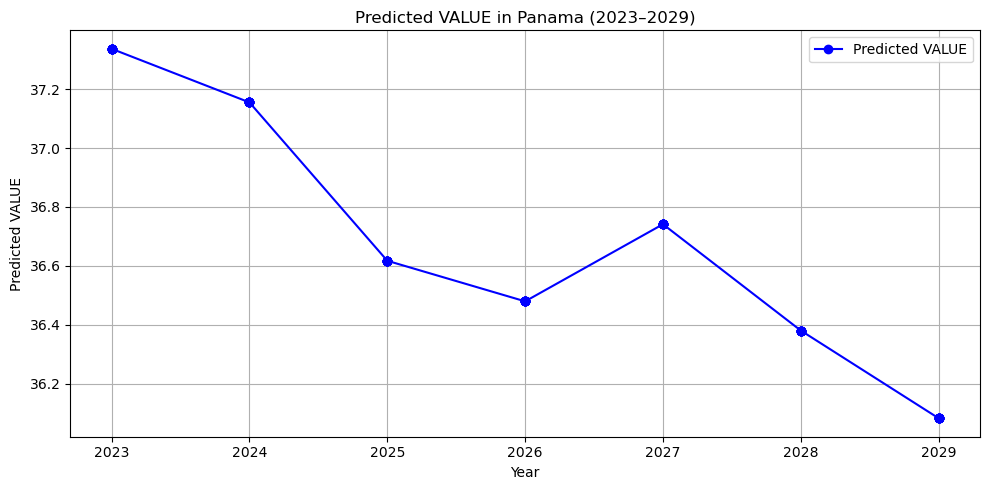

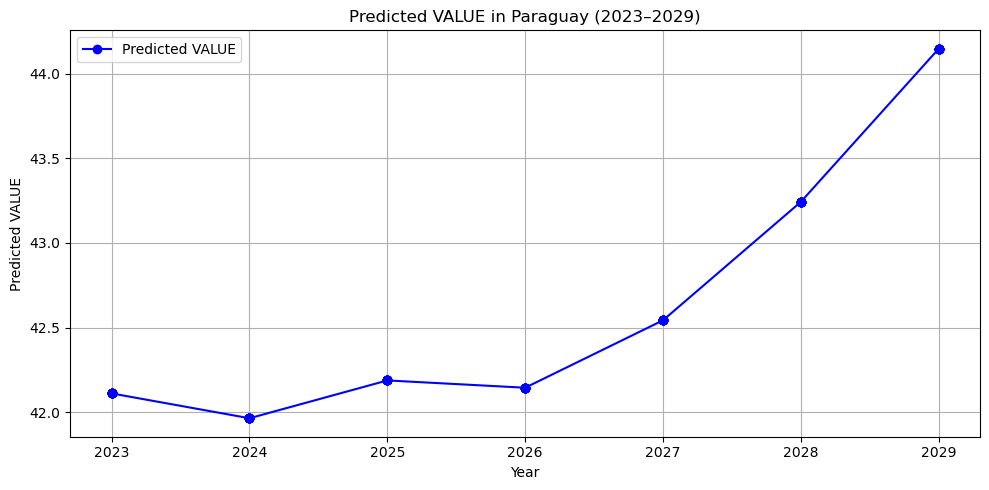

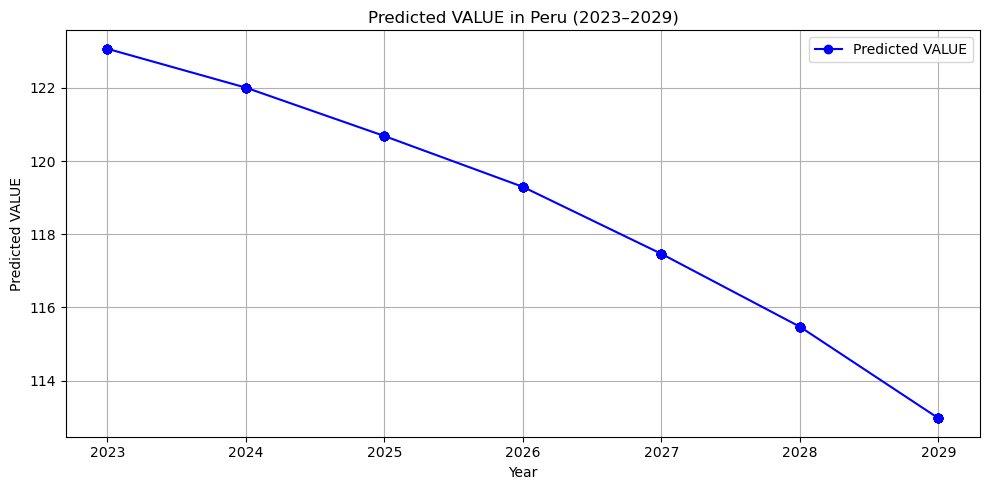

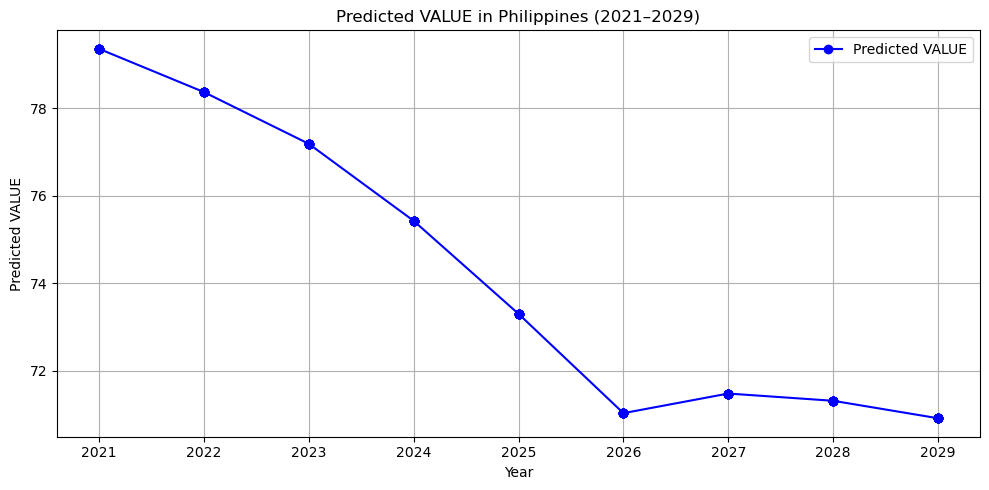

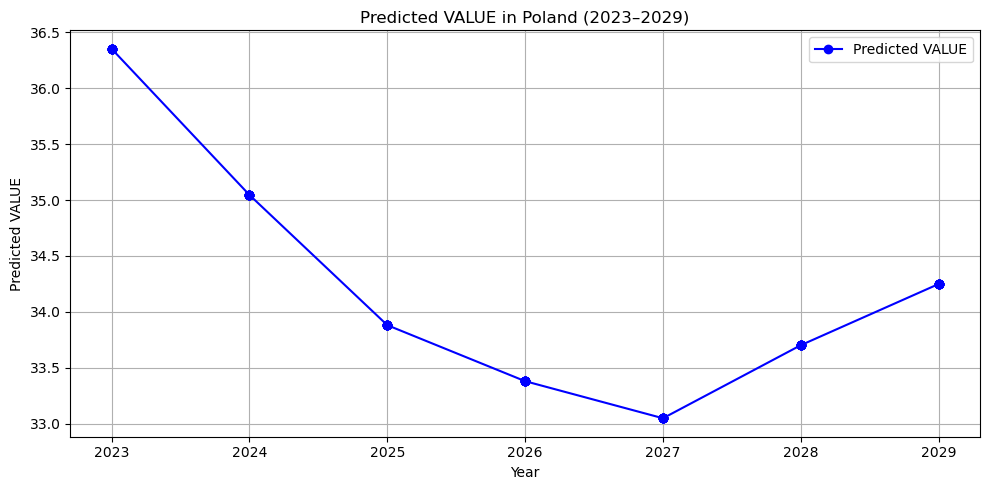

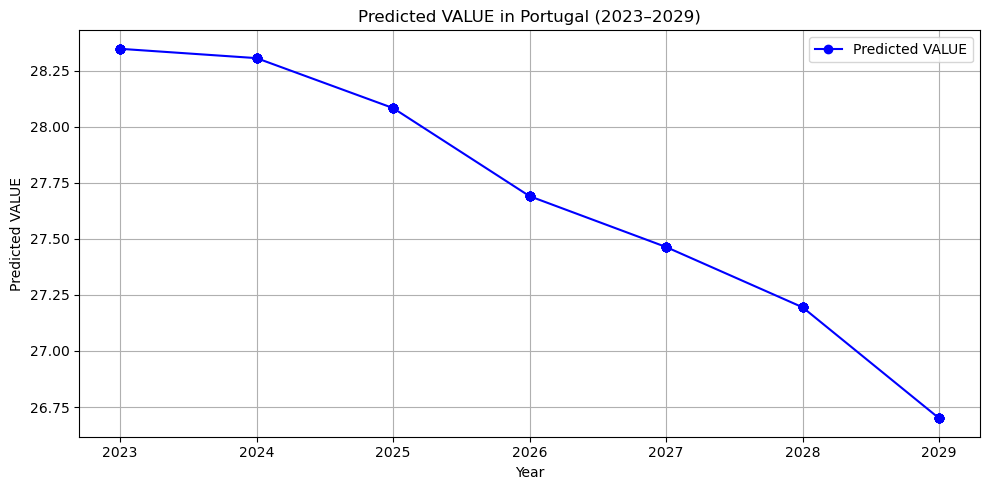

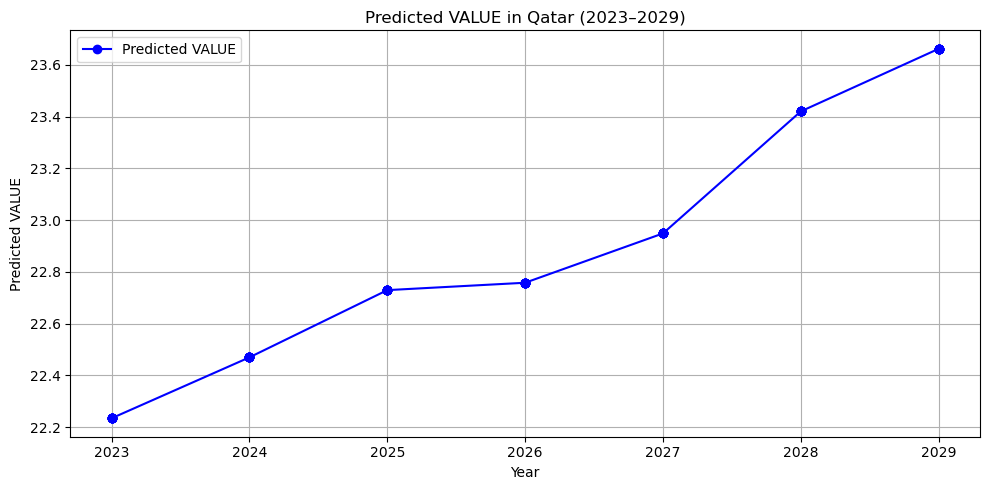

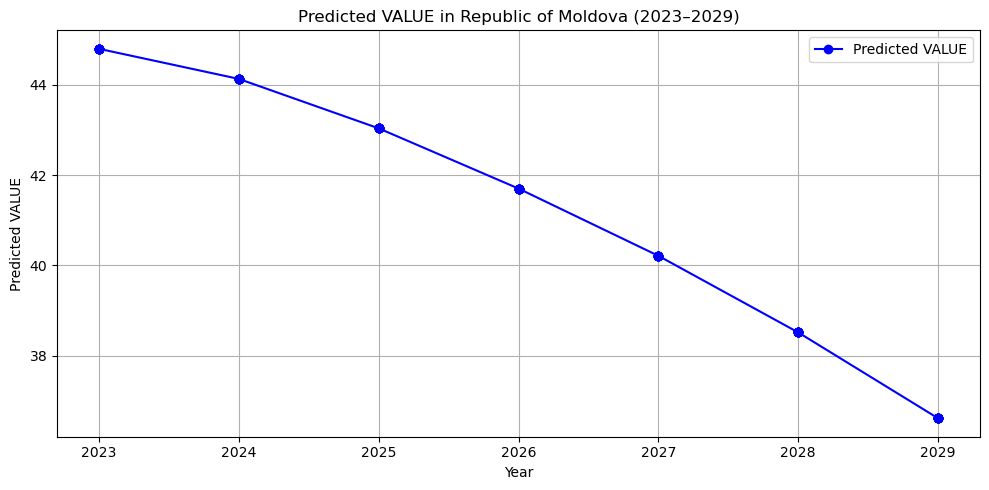

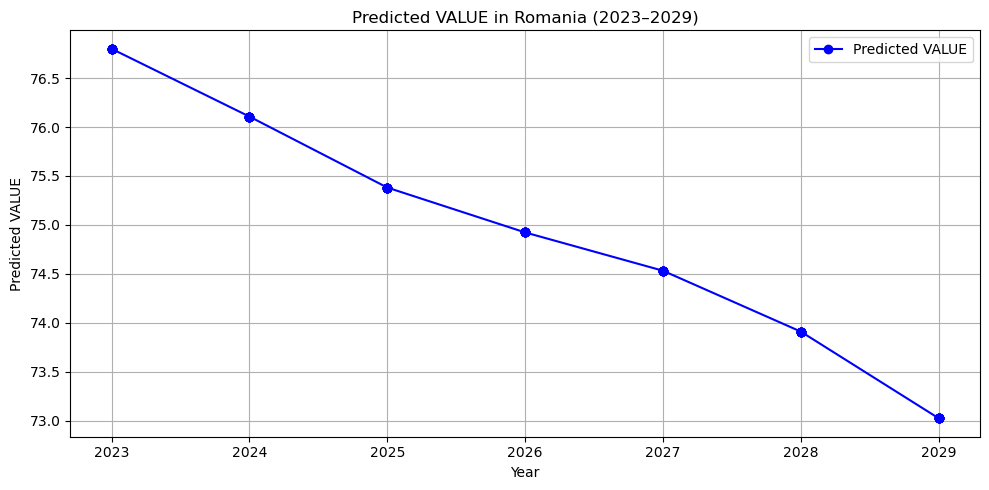

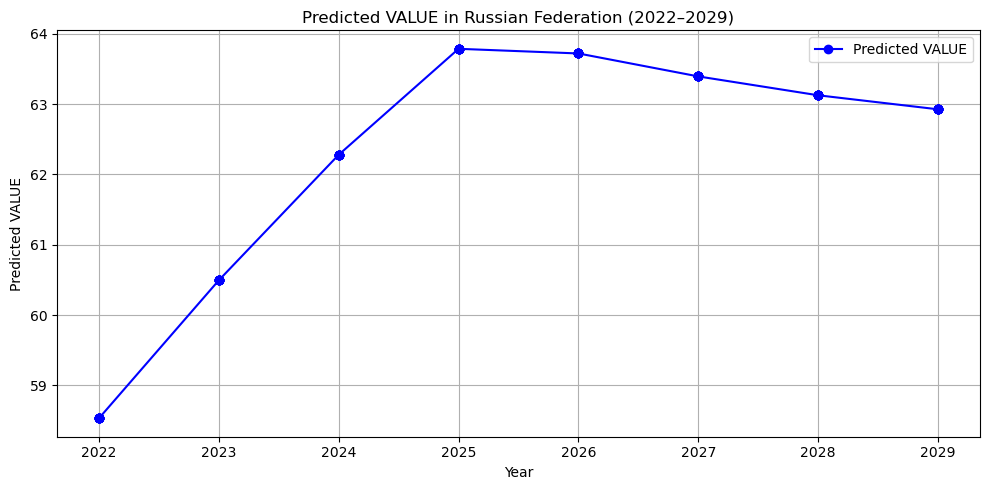

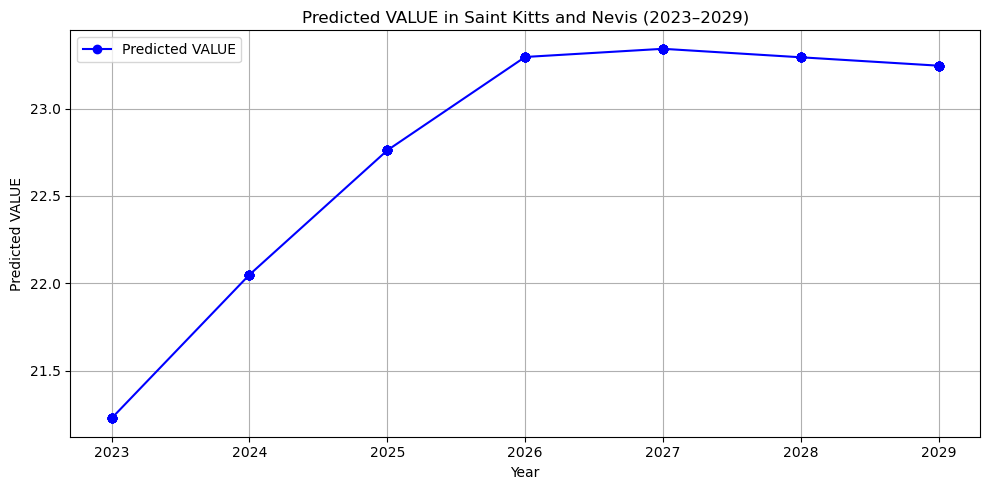

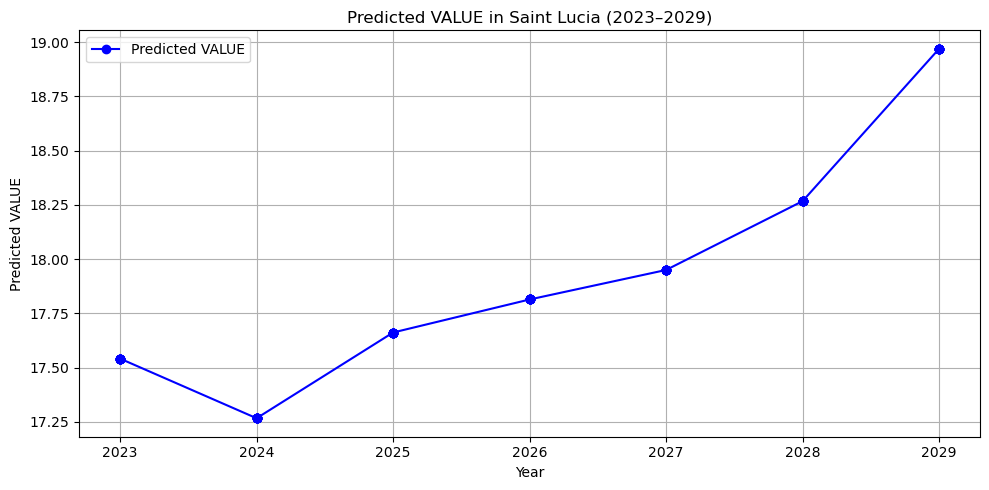

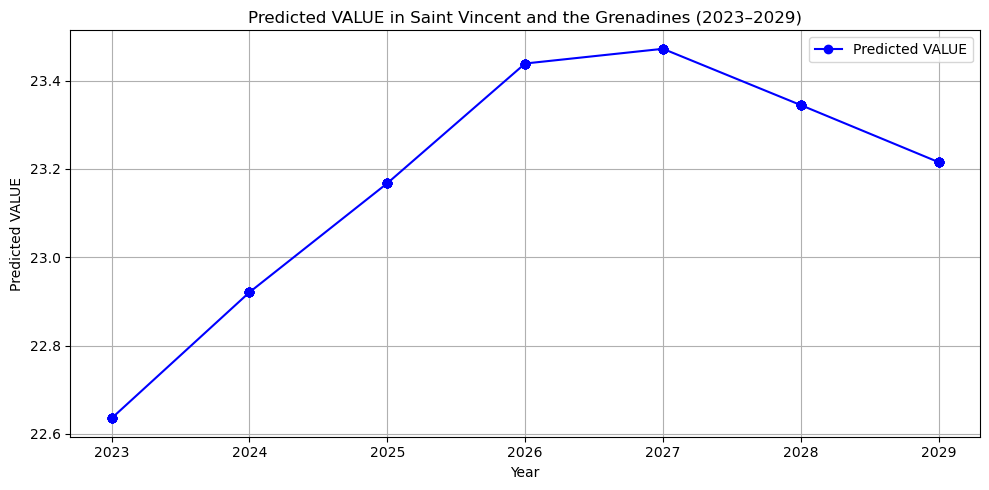

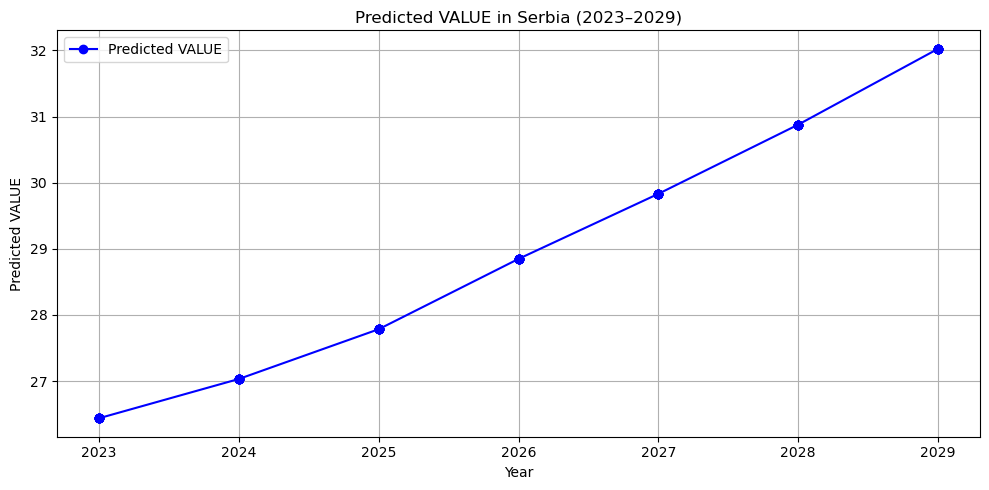

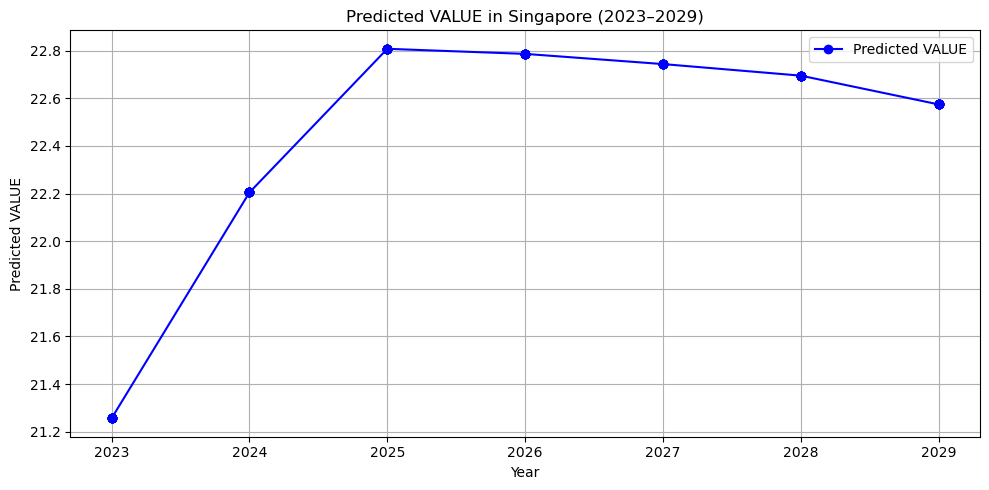

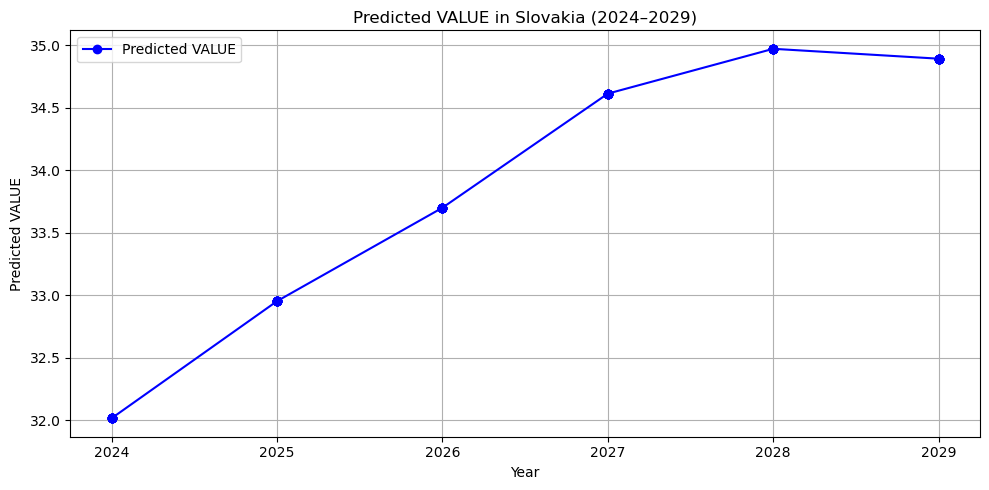

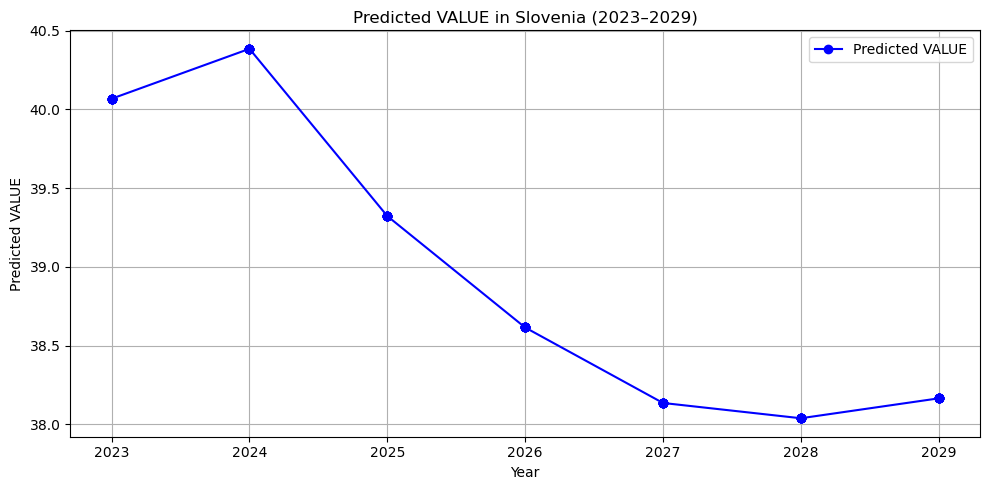

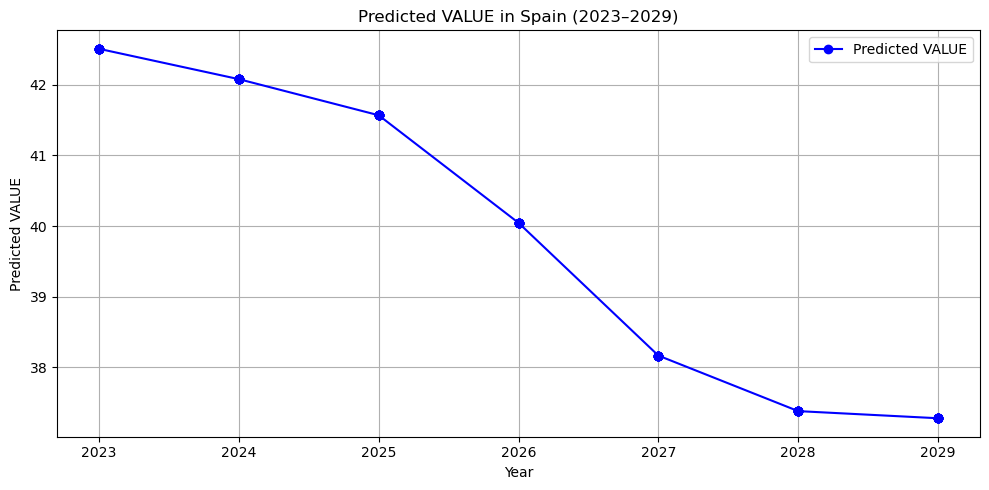

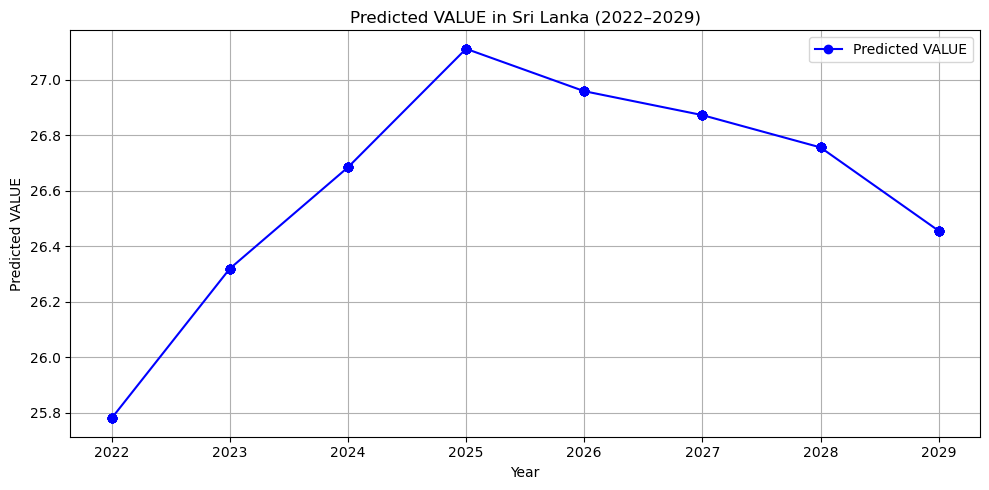

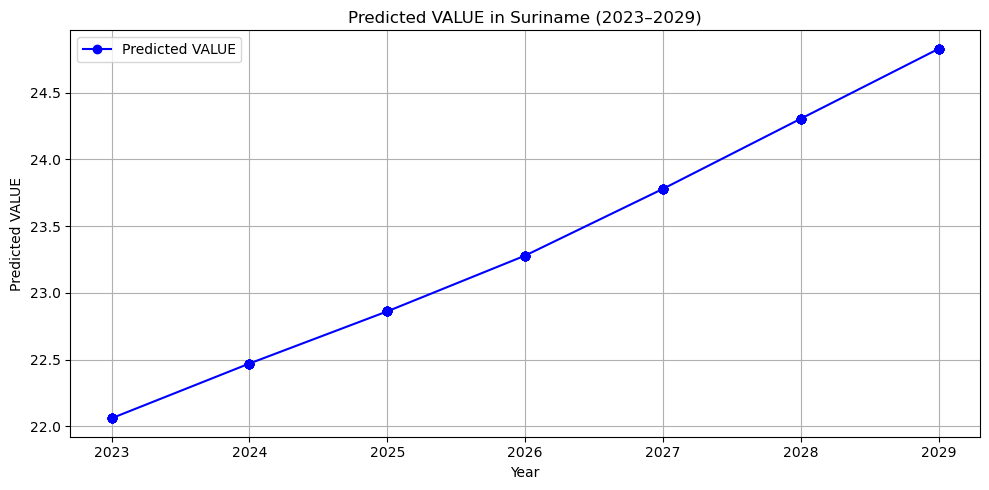

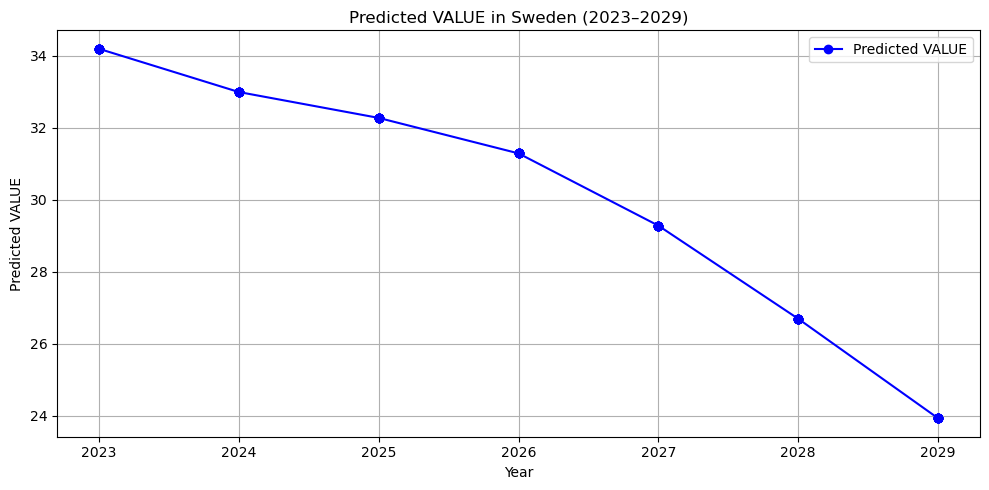

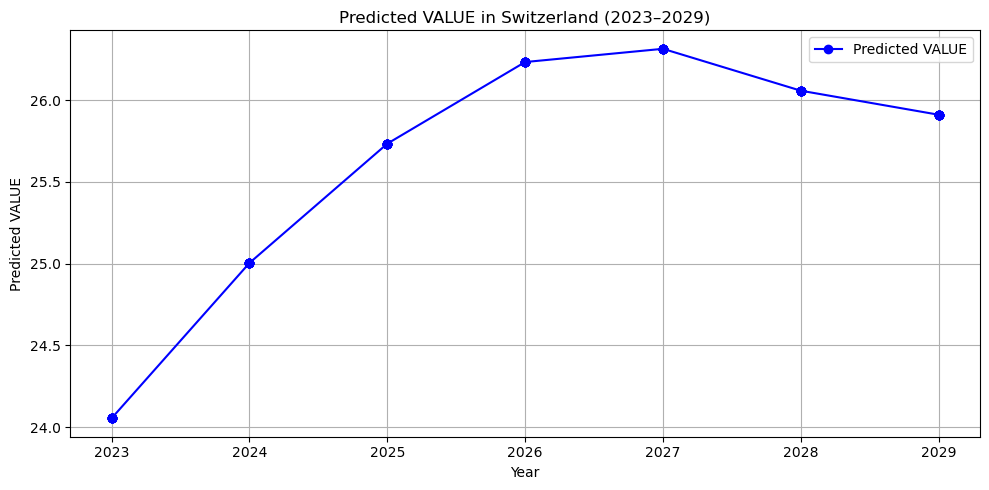

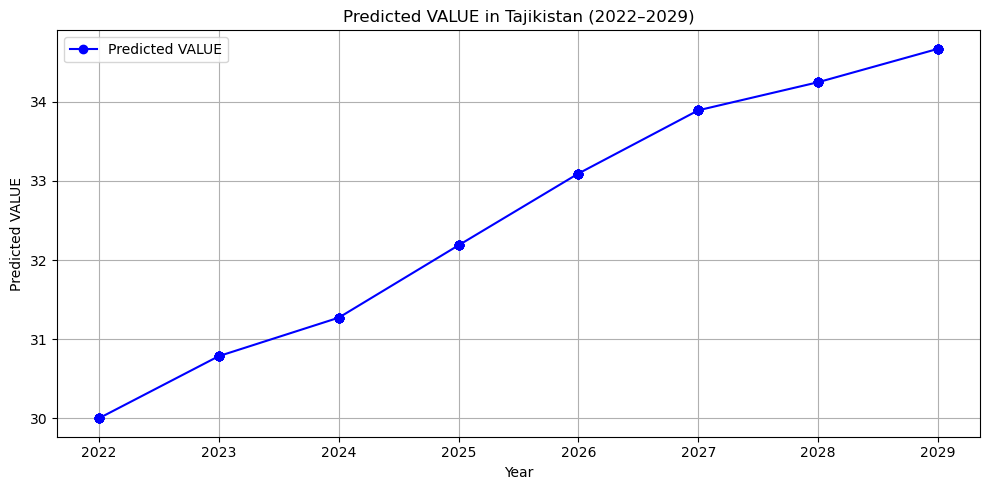

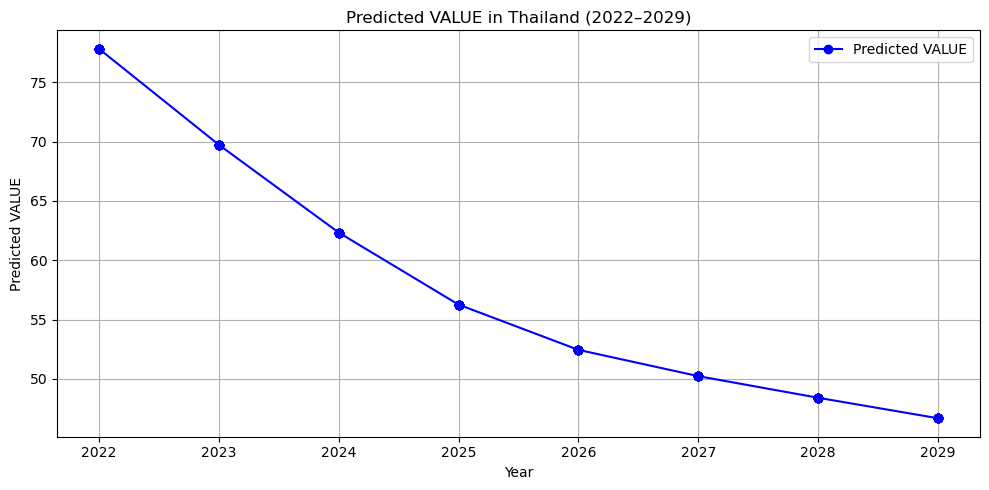

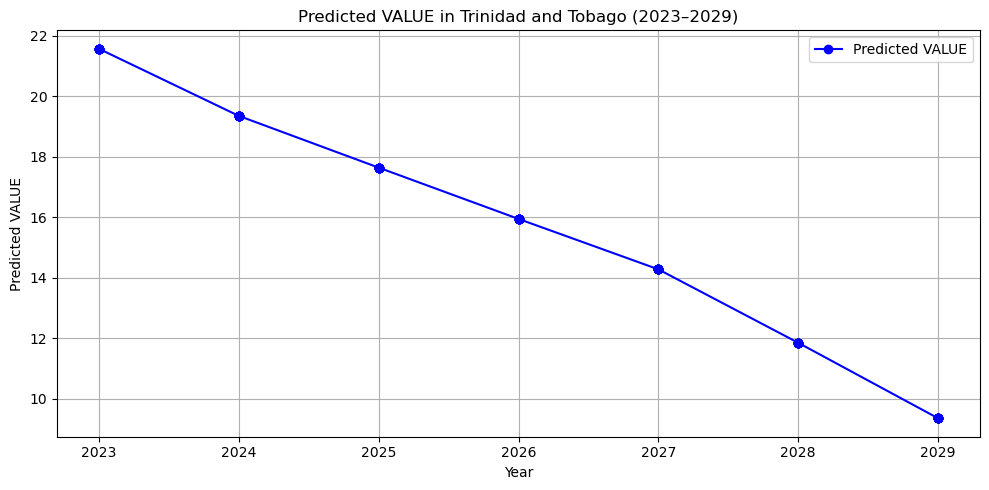

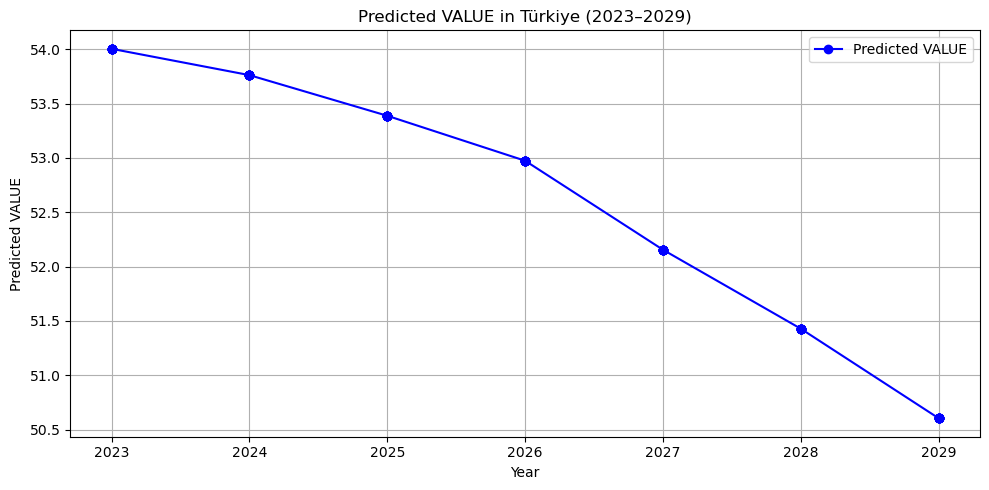

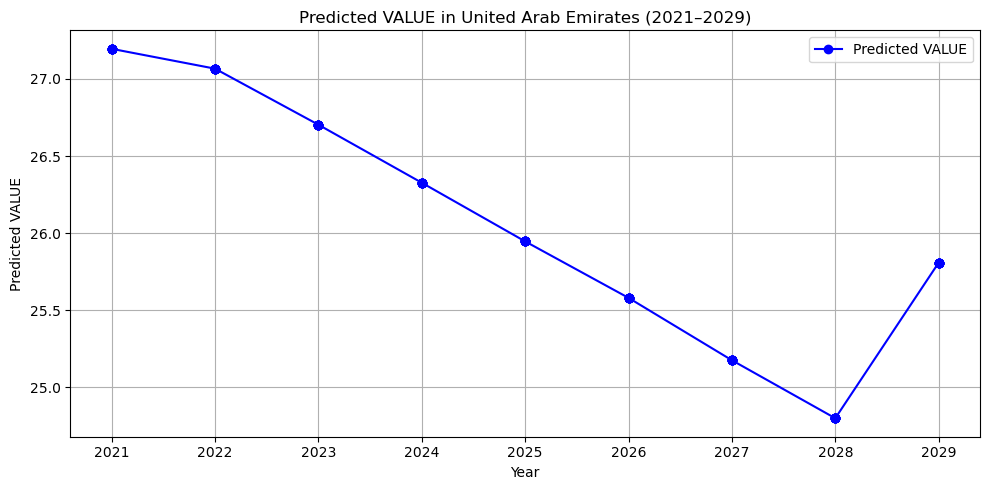

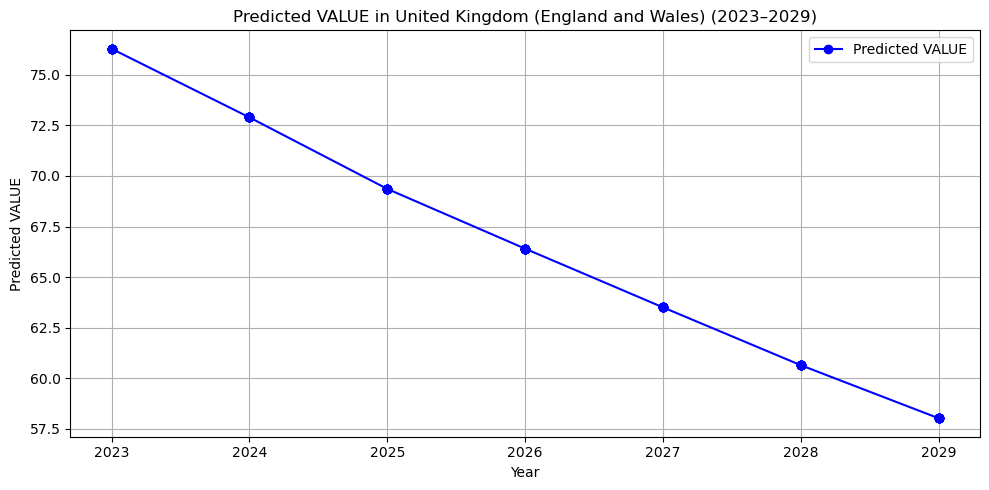

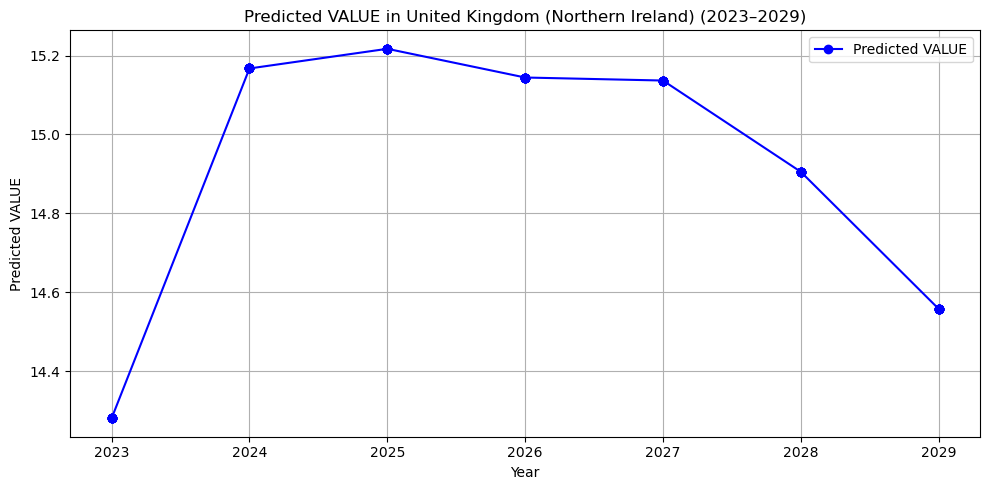

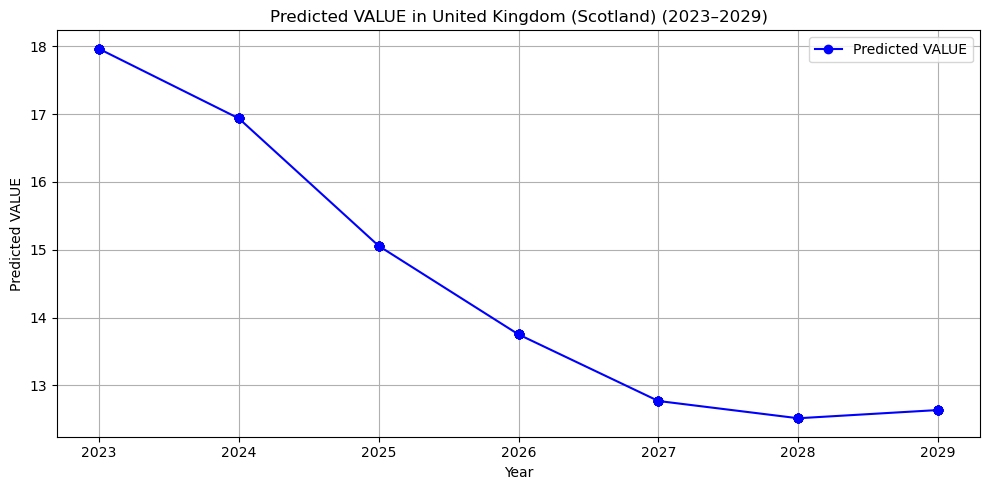

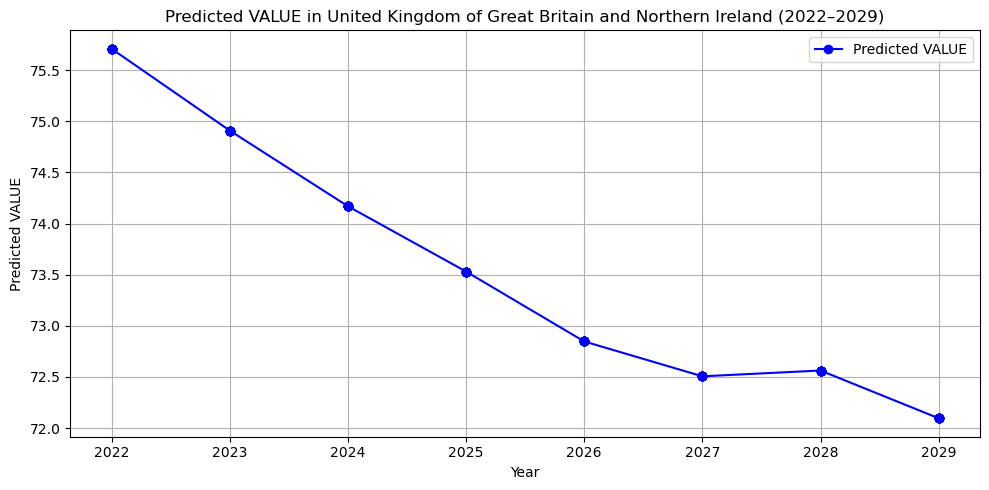

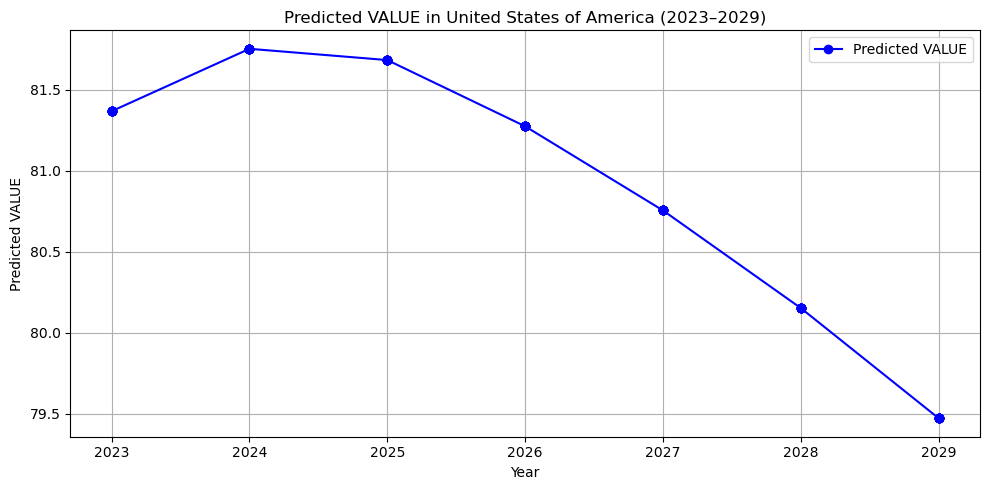

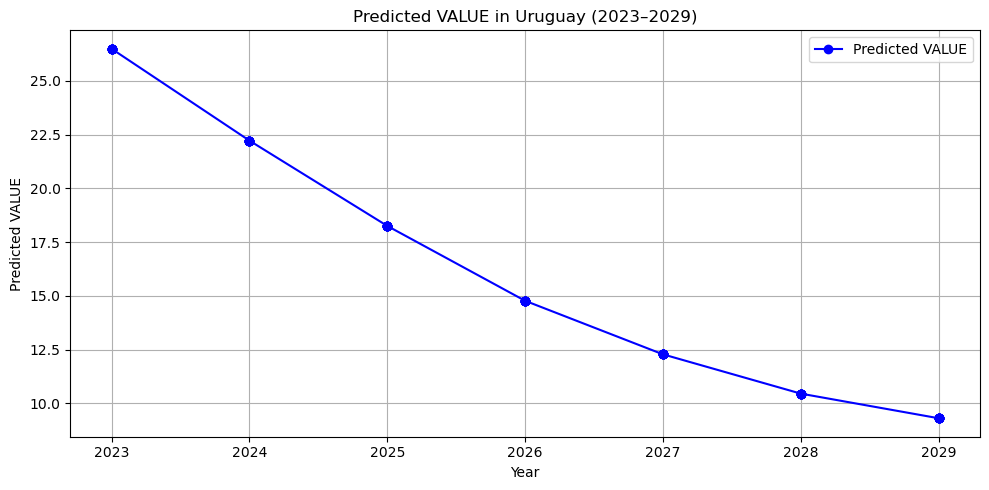

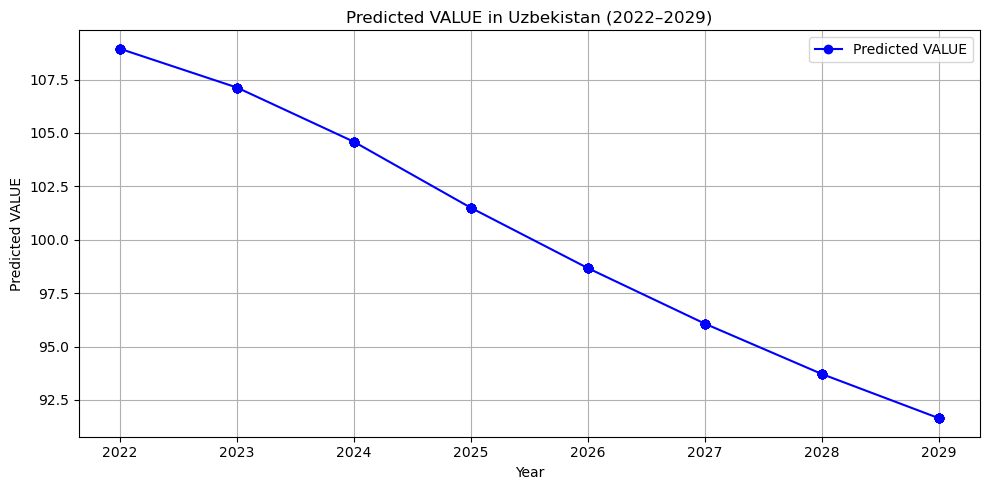

In [26]:
countries = df['Country'].unique()

# Loop through each country and plot
for country in countries:
    country_data = df[df['Country'] == country].sort_values('Year')

    plt.figure(figsize=(10, 5))
    plt.plot(country_data["Year"], country_data["VALUE"], marker='o', linestyle='-', color='blue', label="Predicted VALUE")
    plt.title(f"Predicted VALUE in {country} ({country_data['Year'].min()}–{country_data['Year'].max()})")
    plt.xlabel("Year")
    plt.ylabel("Predicted VALUE")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

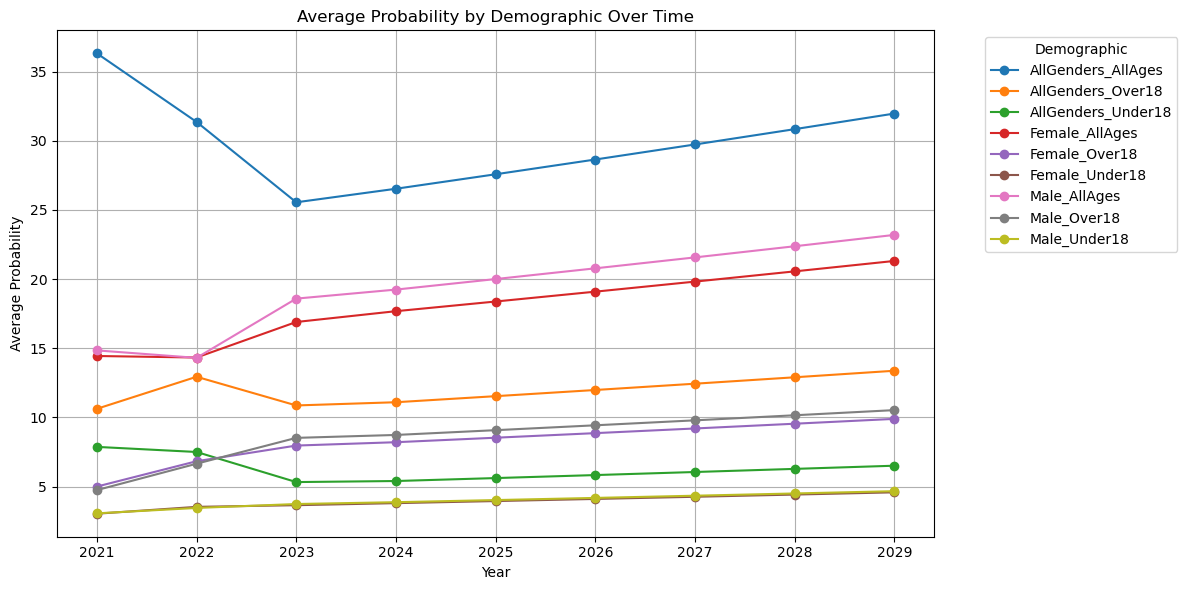

In [27]:
# Group by Year and Demographic, calculate average Probability
grouped = df.groupby(["Year", "Demographic"])["Probability"].mean().reset_index()

# Pivot for easier plotting
pivot = grouped.pivot(index="Year", columns="Demographic", values="Probability")

# Plot
plt.figure(figsize=(12, 6))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker='o', label=col)

plt.title("Average Probability by Demographic Over Time")
plt.xlabel("Year")
plt.ylabel("Average Probability")
plt.legend(title="Demographic", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Get top 8 countries for demonstration

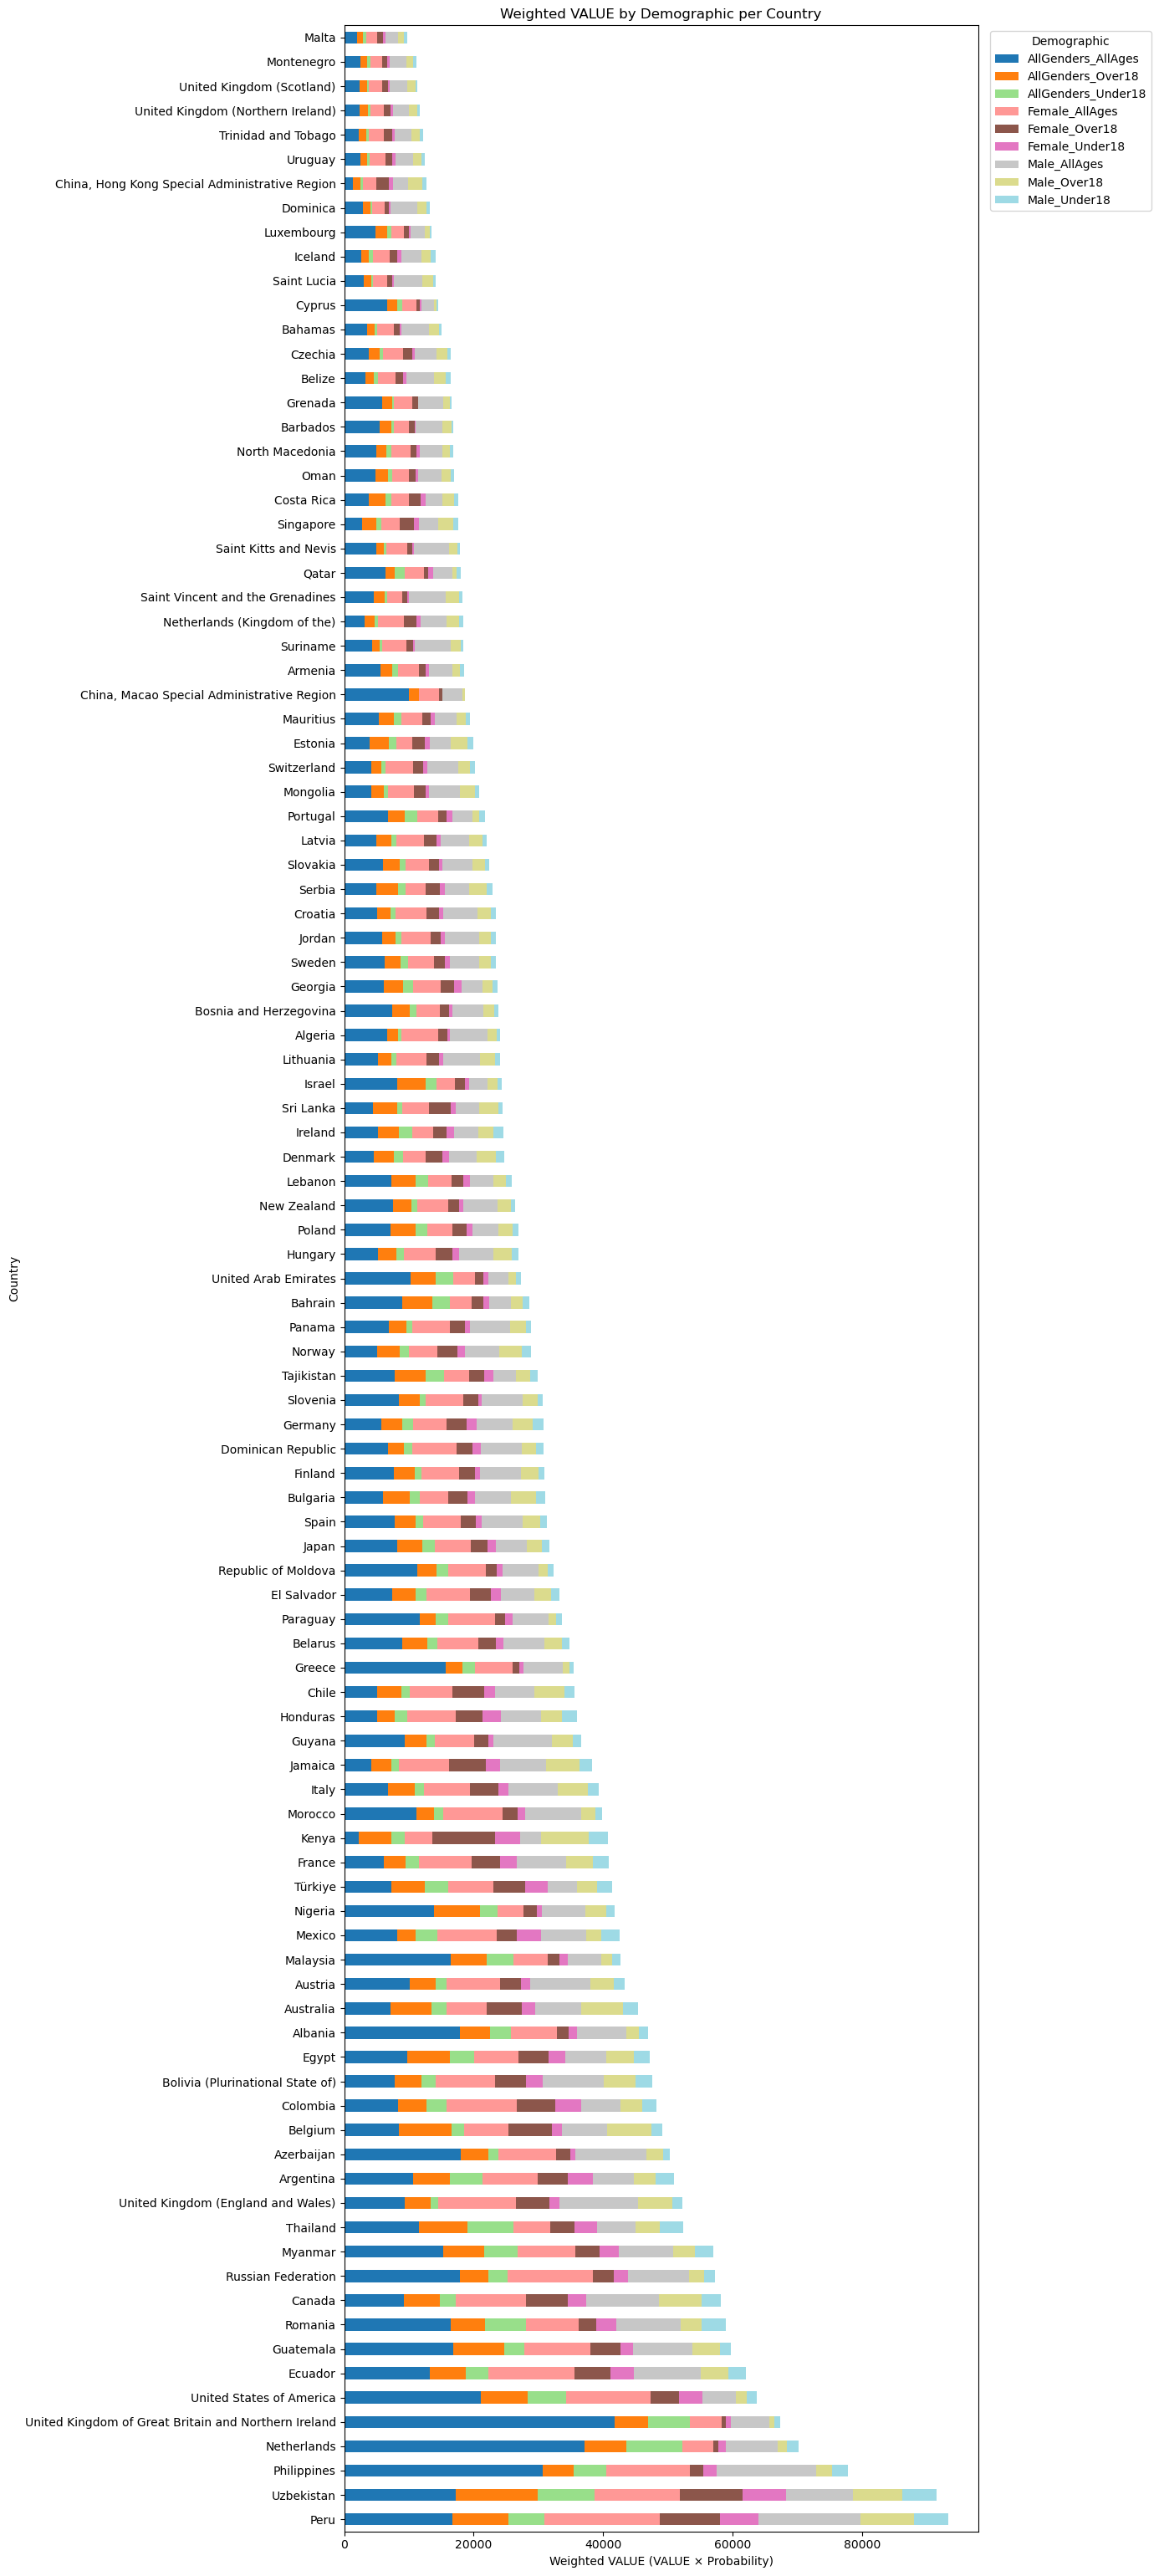

In [29]:
import matplotlib.pyplot as plt
df["Weighted_VALUE"] = df["VALUE"] * df["Probability"]

# Optional: filter by a specific year
# df = df[df["Year"] == 2025]

# Group and reshape
grouped = df.groupby(["Country", "Demographic"])["Weighted_VALUE"].sum().unstack(fill_value=0)

# Sort by total value
grouped["Total"] = grouped.sum(axis=1)
grouped = grouped.sort_values("Total", ascending=False).drop(columns="Total")

# Optional: show only top N countries
# grouped = grouped.head(50)

# Plot horizontally
grouped.plot(kind="barh", stacked=True, figsize=(14, len(grouped) * 0.3), colormap="tab20")

plt.title("Weighted VALUE by Demographic per Country")
plt.xlabel("Weighted VALUE (VALUE × Probability)")
plt.ylabel("Country")
plt.legend(title="Demographic", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

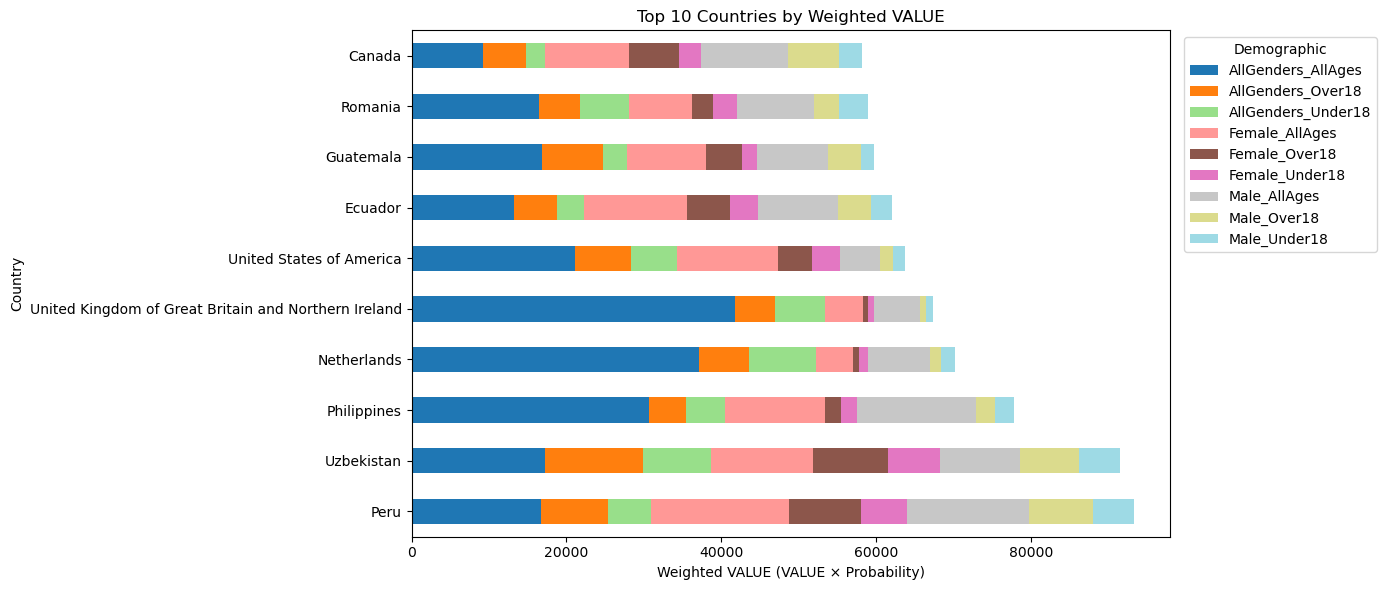

<Figure size 1400x600 with 0 Axes>

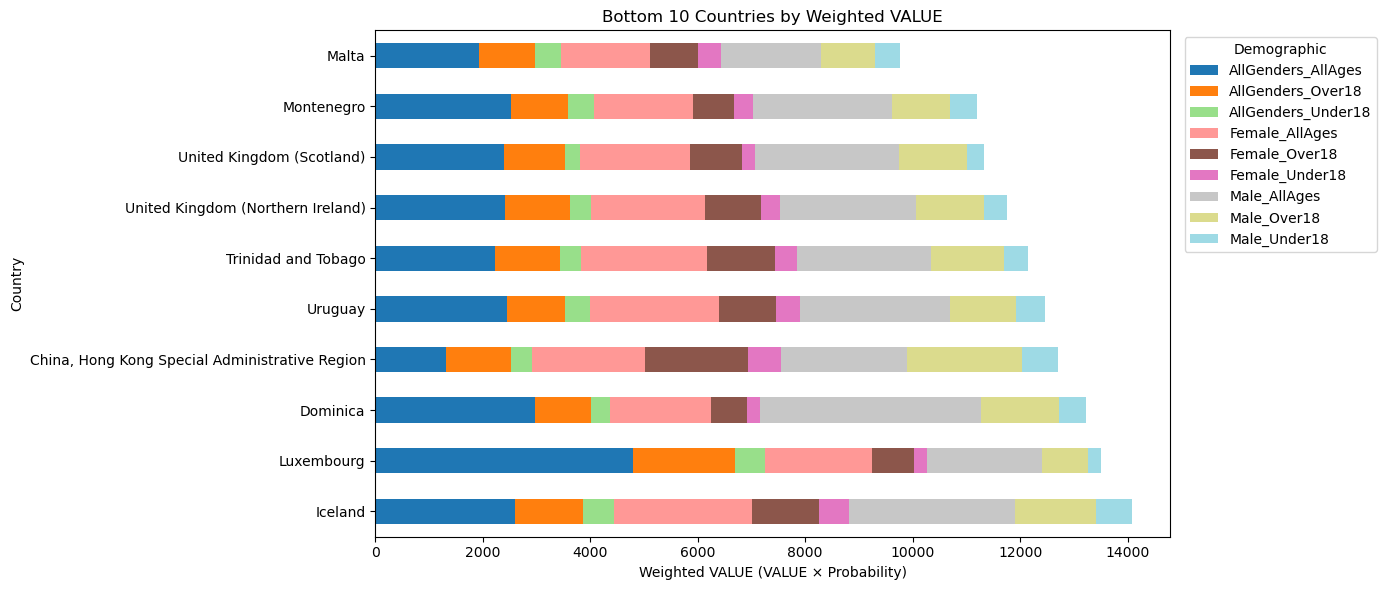

In [30]:
df["Weighted_VALUE"] = df["VALUE"] * df["Probability"]

# Group and reshape
grouped = df.groupby(["Country", "Demographic"])["Weighted_VALUE"].sum().unstack(fill_value=0)

# Calculate total weighted value per country
grouped["Total"] = grouped.sum(axis=1)

# Sort by total value
grouped_sorted = grouped.sort_values("Total", ascending=False)

# Select top 10 and bottom 10 countries
top_10 = grouped_sorted.head(10).drop(columns="Total")
bottom_10 = grouped_sorted.tail(10).drop(columns="Total")

# Plotting top 10
plt.figure(figsize=(14, 6))
top_10.plot(kind="barh", stacked=True, colormap="tab20", figsize=(14, 6))
plt.title("Top 10 Countries by Weighted VALUE")
plt.xlabel("Weighted VALUE (VALUE × Probability)")
plt.ylabel("Country")
plt.legend(title="Demographic", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Plotting bottom 10
plt.figure(figsize=(14, 6))
bottom_10.plot(kind="barh", stacked=True, colormap="tab20", figsize=(14, 6))
plt.title("Bottom 10 Countries by Weighted VALUE")
plt.xlabel("Weighted VALUE (VALUE × Probability)")
plt.ylabel("Country")
plt.legend(title="Demographic", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()


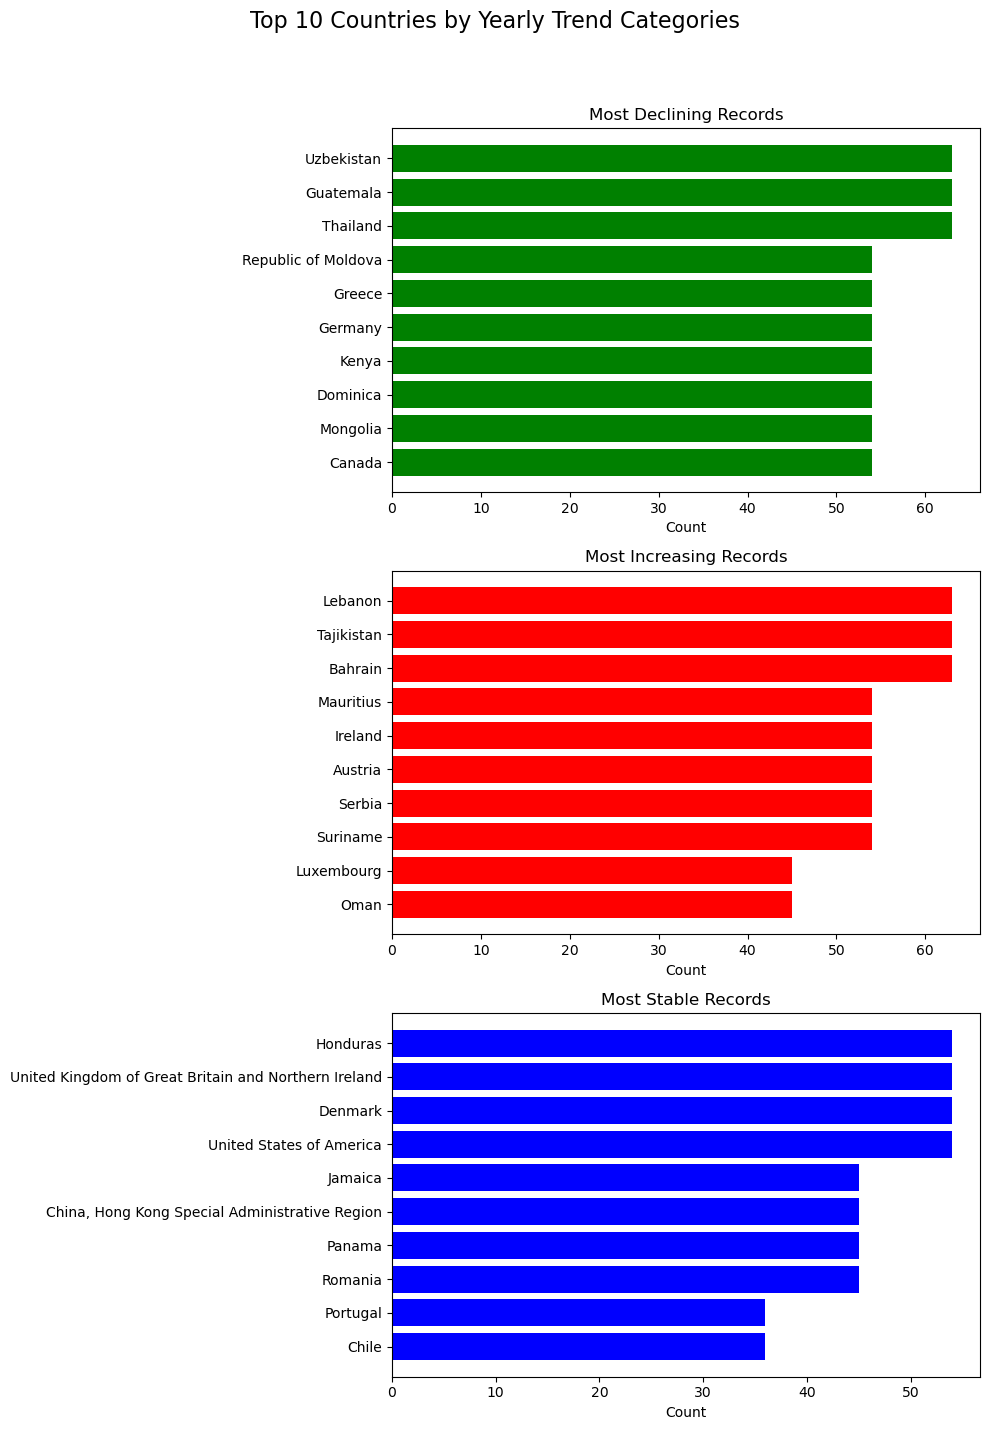

In [40]:

# Grouping and unstacking yearly trend data
trend_counts = df.groupby(["Country", "Yearly_Trend"]).size().unstack(fill_value=0)

# Renaming columns for clarity (optional)
trend_counts = trend_counts.rename(columns={
    "Declining": "DecliningCount",
    "Stable": "StableCount",
    "First Year": "FirstYearCount",
    "Increase": "ImprovingCount"
})

# Get top 10 for each category
most_declining = trend_counts.sort_values("DecliningCount", ascending=False).head(10)
most_improving = trend_counts.sort_values("ImprovingCount", ascending=False).head(10)
most_stable = trend_counts.sort_values("StableCount", ascending=False).head(10)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Top 10 Countries by Yearly Trend Categories', fontsize=16)

# Declining
axs[0].barh(most_declining.index, most_declining["DecliningCount"], color='green')
axs[0].set_title("Most Declining Records")
axs[0].invert_yaxis()
axs[0].set_xlabel("Count")

# Improving
axs[1].barh(most_improving.index, most_improving["ImprovingCount"], color='red')
axs[1].set_title("Most Increasing Records")
axs[1].invert_yaxis()
axs[1].set_xlabel("Count")

# Stable
axs[2].barh(most_stable.index, most_stable["StableCount"], color='blue')
axs[2].set_title("Most Stable Records")
axs[2].invert_yaxis()
axs[2].set_xlabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* analizing turkey data

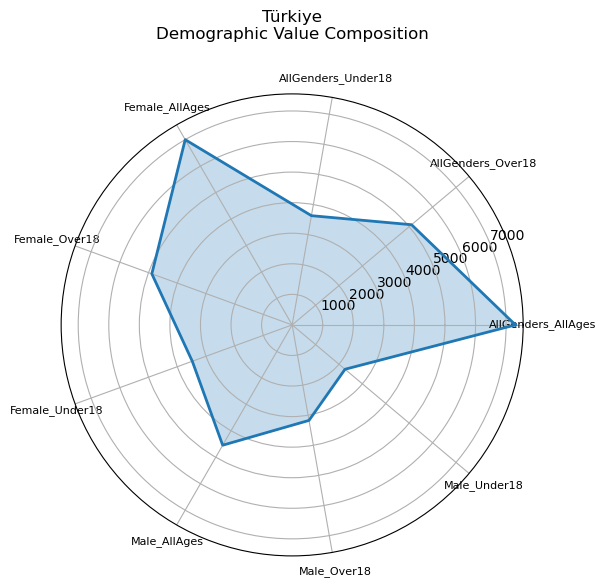

In [35]:
df["Weighted_Value"] = df["VALUE"] * df["Probability"]

def make_radar_chart(country):
    country_data = df[df['Country']==country]
    demo_values = country_data.groupby('Demographic')["Weighted_Value"].sum()
    
    categories = demo_values.index.tolist()
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, polar=True)
    
    values = demo_values.values.tolist()
    values += values[:1]
    ax.plot(angles, values, color='#1f77b4', linewidth=2)
    ax.fill(angles, values, color='#1f77b4', alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=8)
    plt.title(f"{country}\nDemographic Value Composition", y=1.1)
    plt.show()

# Example usage
make_radar_chart("Türkiye")

C:\Users\hp\AppData\Local\Temp\ipykernel_19356\2639798726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df["Weighted_VALUE"] = country_df["VALUE"] * country_df["Probability"]


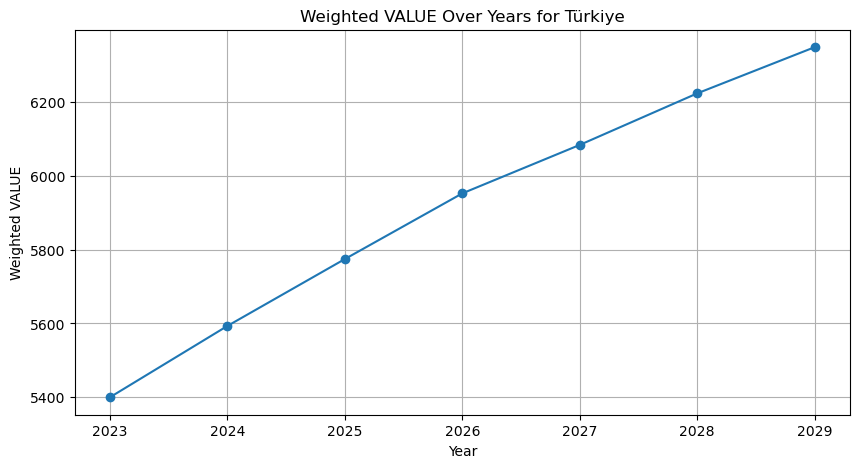

In [36]:
country_name = "Türkiye"
country_df = df[df["Country"] == country_name]

# Total weighted value over years
country_df["Weighted_VALUE"] = country_df["VALUE"] * country_df["Probability"]
yearly = country_df.groupby("Year")["Weighted_VALUE"].sum()

plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly.values, marker='o')
plt.title(f"Weighted VALUE Over Years for {country_name}")
plt.xlabel("Year")
plt.ylabel("Weighted VALUE")
plt.grid(True)
plt.show()

In [37]:
#columns_to_drop = ["Gender", "Age", "YoY_Pct_Change", "Growth_Stage"]
#db_df = df.drop(columns=columns_to_drop)
#db_df = [
#    "Id", "Country", "Year", "VALUE", "Demographic", "Probability",
#    "Baseline", "YoY_Pct_Change", "Yearly_Trend",
#    "Rolling_Slope", "Rolling_Trend", "Cumulative_Growth"
#]

# Keep only the DB columns and reorder them
#db_df = df[db_df]

# Save to a new CSV
#db_df.to_csv("SAFETY_FOR_IMPORT.csv", index=False)

In [38]:
import os
import matplotlib.pyplot as plt

# Ensure the directory exists
output_dir = "country_charts"
os.makedirs(output_dir, exist_ok=True)

countries = df['Country'].unique()

for country in countries:
    country_data = df[df['Country'] == country].sort_values('Year')

    plt.figure(figsize=(10, 5))
    plt.plot(country_data["Year"], country_data["VALUE"], marker='o', linestyle='-', color='blue', label="Predicted VALUE")
    plt.title(f"Predicted VALUE in {country} ({country_data['Year'].min()}–{country_data['Year'].max()})")
    plt.xlabel("Year")
    plt.ylabel("Predicted VALUE")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Save the plot to a file inside the project
    safe_country_name = country.replace(" ", "_").replace("/", "_")
    filename = os.path.join(output_dir, f"{safe_country_name}_value_trend.png")
    plt.savefig(filename, dpi=300)
    plt.close()  # Close the figure to free memory
